## Introducción al Análisis de Datos de Alquileres, Ruido y Accidentes de Tráfico en Barcelona

Este Jupyter Notebook se enfoca en un análisis detallado y multidimensional de la ciudad de Barcelona, combinando información sobre alquileres, exposición al ruido y accidentes de tráfico. Utilizaré los tres conjuntos de datos proporcionados por Open Data Barcelona para llevar a cabo el reto.

## Objetivos

1. Unificación de Datos: Escogeré los tres conjuntos de datos disponibles. El conjunto de alquileres será el conjunto base y lo combinaré con los otros dos (ruido y accidentes de tráfico) para obtener una visión integrada.
2. Preprocesamiento de Datos: Me aseguraré de que los datos sean precisos y manejables. Esto incluirá limpieza, estandarización y/o normalización de las variables.
3. Utilizar un mapa de Barcelona para la fácil visualización de los resultados.

Aparte de estos tres objetivos, propongo tres preguntas sobre el reto para delimitar el dominio del problema. Estas preguntas son:

- ¿Qué barrios son los más caros y más baratos de Barcelona?
- ¿El ruido tiene un impacto en el precio del alquiler?
- ¿En qué barrio tendremos un peor descanso por culpa del ruido?
- ¿Hay una relación clara entre la cantidad de accidentes y el precio del alquiler? ¿Y sobre el ruido?
- ¿Qué tipo de accidentes son más comunes en los distintos tipos de barrios?
- ¿Cual es el mejor barrio para vivir dependiendo el alquiler, ruido y accidentes?

¡Pues sin más dilación empecemos con el reto!


## Introduccion

En este apartado exploraremos los distintos dataset para poder entederlos y realizar una correcta limpieza de los mismo. Las librerias usadas seran:

1. **Pandas (`pd`)**: 
   - **Función Principal**: Manejo y análisis de datos.
   - **Usos Comunes**: Pandas es excelente para la manipulación de datos en forma de tablas (similar a hojas de cálculo) y series temporales. Permite realizar operaciones de limpieza, transformación, agregación y visualización de datos. Se usa extensamente en tareas de ciencia de datos, análisis de datos, y estadística.

2. **NumPy (`np`)**:
   - **Función Principal**: Computación científica.
   - **Usos Comunes**: NumPy es una biblioteca fundamental para la computación científica en Python. Proporciona un objeto de matriz multidimensional, varios objetos derivados (como matrices enmascaradas y matrices), y una variedad de rutinas para operaciones rápidas en matrices, incluyendo matemáticas, lógica, manipulación de formas, ordenación, selección, E/S, transformadas de Fourier, álgebra lineal, operaciones estadísticas, simulación aleatoria, y mucho más.

3. **Matplotlib (`plt`)**:
   - **Función Principal**: Visualización de datos.
   - **Usos Comunes**: Matplotlib es una biblioteca de trazado para Python y su extensión numérica matemática NumPy. Se utiliza para crear gráficos y visualizaciones estáticas, animadas e interactivas en Python. Es muy flexible y permite a los usuarios generar gráficos, histogramas, espectros de potencia, gráficos de barras, diagramas de errores, diagramas de dispersión, etc., con solo unas pocas líneas de código.

4. **Seaborn (`sns`)**:
   - **Función Principal**: Visualización de datos estadísticos.
   - **Usos Comunes**: Seaborn es una biblioteca de visualización de datos basada en Matplotlib. Proporciona una interfaz de alto nivel para la creación de gráficos estadísticos atractivos e informativos. Seaborn simplifica la creación de ciertos tipos de gráficos, como mapas de calor, diagramas de caja, y gráficos de violín, y se integra bien con las estructuras de datos de Pandas.

5. **GeoPandas (`gpd`)**:
   - **Función Principal**: Manipulación y análisis de datos geoespaciales.
   - **Usos Comunes**: GeoPandas es una extensión de Pandas para el trabajo con datos geoespaciales. Facilita operaciones como la manipulación de formas geográficas y la realización de operaciones espaciales dentro de un marco de datos de Pandas. Es útil para trabajar con datos que tienen una componente geográfica (por ejemplo, mapas, coordenadas geográficas, datos de sistemas de información geográfica -SIG-).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

### Limpiando dataset Precio Alquiler

Empezamos realizando una lectura basica del dataset de los precios del aquiler:

In [2]:
alquileres = pd.read_csv('data/2017_lloguer_preu_trim.csv')

print("El dataset tiene", alquileres.shape[0], "filas y", alquileres.shape[1], "columnas.\n")
print("Las columnas y sus tipos de datos son:")
print(alquileres.dtypes)

alquileres.head()

El dataset tiene 584 filas y 8 columnas.

Las columnas y sus tipos de datos son:
Any                 int64
Trimestre           int64
Codi_Districte      int64
Nom_Districte      object
Codi_Barri          int64
Nom_Barri          object
Lloguer_mitja      object
Preu              float64
dtype: object


,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2017,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),734.99
1,2017,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),905.26
2,2017,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),722.78
3,2017,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),895.28
4,2017,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),871.08


In [3]:
print("Valores únicos de la columna Any:")
print(alquileres.Any.unique())
print("Valores únicos de la columna Trimestre:")
print(alquileres.Trimestre.unique())
print("Valores únicos de la columna Lloguer_mitja:")
print(alquileres.Lloguer_mitja.unique())

Valores únicos de la columna Any:
[2017]
Valores únicos de la columna Trimestre:
[1 2 3 4]
Valores únicos de la columna Lloguer_mitja:
['Lloguer mitjà mensual (Euros/mes)'
 'Lloguer mitjà per superfície (Euros/m2 mes)']


El dataset `2017_lloguer_preu_trim` parece estar relacionado con datos de alquileres en diferentes distritos y barrios para el año 2017. Basándome en la información proporcionada:

**Dimensiones del dataset**: Contiene 584 filas y 8 columnas.

**Descripción de las columnas**:
   - **Any**: Representa el año. Todos los registros en esta columna tienen el valor 2017.
   - **Trimestre**: Indica el trimestre del año. Los valores únicos son [1, 2, 3, 4], lo que significa que el dataset contiene información de los cuatro trimestres del año.
   - **Codi_Districte**: Un código numérico que parece identificar a cada distrito.
   - **Nom_Districte**: El nombre del distrito correspondiente al código anterior.
   - **Codi_Barri**: Un código numérico que identifica a cada barrio dentro de un distrito.
   - **Nom_Barri**: El nombre del barrio correspondiente al código anterior.
   - **Lloguer_mitjà**: Descripción del tipo de dato relacionado con el alquiler. Los valores únicos son:
     - 'Lloguer mitjà mensual (Euros/mes)': Alquiler medio mensual en euros.
     - 'Lloguer mitjà per superfície (Euros/m2 mes)': Alquiler medio por superficie en euros por metro cuadrado al mes.
   - **Preu**: El valor numérico del alquiler medio mensual en euros o el alquiler medio por superficie, dependiendo del tipo de "Lloguer_mitjà".

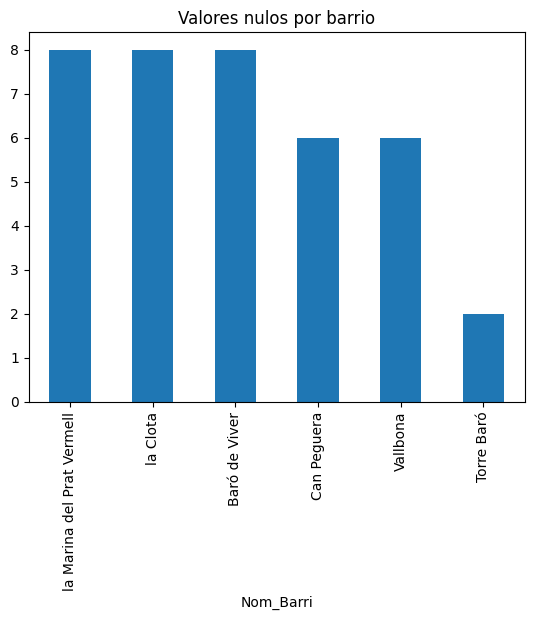

In [4]:
alquileres[alquileres['Preu'].isnull()]['Nom_Barri'].value_counts().plot(kind='bar')
plt.title('Valores nulos por barrio')
plt.show()

**Observaciones**:

1. **Marina del Prat Vermell, la Clota, Baró de Viver**: Este barrio tiene la mayor cantidad de valores nulos en la columna 'Preu', con 8 registros faltantes. Estos barrios no contiene ninguna informacion para poder recuperar el precio de 2017.
2. **Can Peguera y Vallbona**: Estos barrios también muestran una cantidad similar de valores nulos, con de 6 registros faltantes cada uno. Habra que ver que campos son los que no estan vacios.
3. **Torre Baró**: Este barrio tiene la menor cantidad de valores nulos entre los barrios mostrados, con solo 2 registros faltantes. Sera facil recuperar los datos del alquiler en 2017.

In [5]:
def fill_nulls(df, barrio, lloguer_mitja):
    # Calcula la media de los precios (Preu) para un barrio y tipo de alquiler específicos, excluyendo los valores nulos
    mean = df[(df['Nom_Barri'] == barrio) & 
                                (df['Lloguer_mitja'] == lloguer_mitja)]['Preu'].mean()

    # Rellena los valores nulos en la columna 'Preu' con la media calculada para las filas que coinciden con el barrio y tipo de alquiler especificados
    df.loc[(df['Nom_Barri'] == barrio) &
                    (df['Lloguer_mitja'] == lloguer_mitja) &
                    (df['Preu'].isnull()), 'Preu'] = mean
    
    return df

alquileres = fill_nulls(alquileres, 'Can Peguera', 'Lloguer mitjà mensual (Euros/mes)')
alquileres = fill_nulls(alquileres, 'Can Peguera', 'Lloguer mitjà per superfície (Euros/m2 mes)')
alquileres = fill_nulls(alquileres, 'Vallbona', 'Lloguer mitjà mensual (Euros/mes)')
alquileres = fill_nulls(alquileres, 'Vallbona', 'Lloguer mitjà per superfície (Euros/m2 mes)')
alquileres = fill_nulls(alquileres, 'Torre Baró', 'Lloguer mitjà mensual (Euros/mes)')
alquileres = fill_nulls(alquileres, 'Torre Baró', 'Lloguer mitjà per superfície (Euros/m2 mes)')

Gracias a la funcion podemos rellenar los valores de precio de los barrios que tenian algunos valores nulos lo mas proximo a su precio en base otro trimestre.

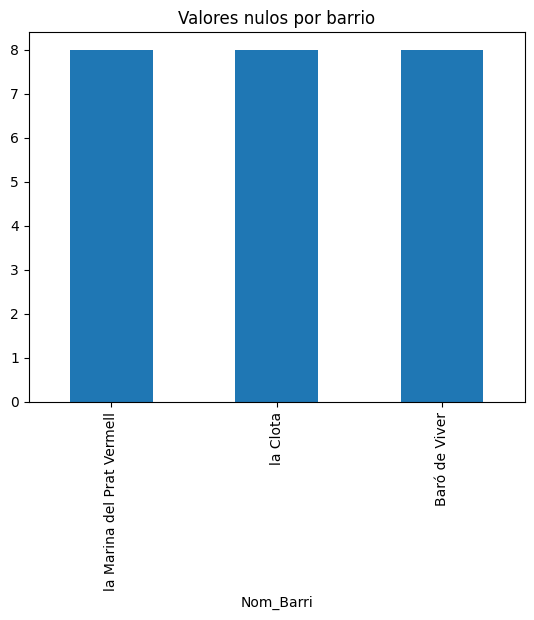

In [6]:
# Muestra que barrios tienen valores nulos en la columna 'Preu'
alquileres[alquileres['Preu'].isnull()]['Nom_Barri'].value_counts().plot(kind='bar')
plt.title('Valores nulos por barrio')
plt.show()

Ahora solo nos quedaria estos barrios con valores nulos, donde rellenaremos los valores con el promedio del alquiler del resto de barrios de Bar

In [7]:
# Los valores nulos en la columna 'Preu' se rellenan con la media de los precios (Preu) para el tipo de alquiler (Lloguer_mitja) especificado
alquileres['Preu'] = alquileres.groupby('Lloguer_mitja')['Preu'].transform(lambda x: x.fillna(x.mean()))

In [8]:
pivot_lloguer_mitja = alquileres.pivot_table(index=['Codi_Districte', 'Nom_Districte', 'Codi_Barri', 'Nom_Barri', 'Trimestre'], columns='Lloguer_mitja', values='Preu', fill_value=0)
pivot_lloguer_mitja = pivot_lloguer_mitja.reset_index()

alquileres = alquileres.merge(pivot_lloguer_mitja, on=['Codi_Districte', 'Nom_Districte', 'Codi_Barri', 'Nom_Barri', 'Trimestre'], how='left')
alquileres.drop(columns=['Lloguer mitjà mensual (Euros/mes)'], inplace=True)
alquileres

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu,Lloguer mitjà per superfície (Euros/m2 mes)
0,2017,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),734.99,13.50
1,2017,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),905.26,14.14
2,2017,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),722.78,19.46
3,2017,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),895.28,15.01
4,2017,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),871.08,12.77
...,...,...,...,...,...,...,...,...,...
579,2017,4,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),16.51,16.51
580,2017,4,10,Sant Martí,70,el Besòs i el Maresme,Lloguer mitjà per superfície (Euros/m2 mes),10.40,10.40
581,2017,4,10,Sant Martí,71,Provençals del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),12.66,12.66
582,2017,4,10,Sant Martí,72,Sant Martí de Provençals,Lloguer mitjà per superfície (Euros/m2 mes),10.83,10.83


In [9]:
# Renombra las columnas Preu y Lloguer mitjà per superfície (Euros/m2 mes) para que no contengan espacios
alquileres.rename(columns={'Preu': 'Preu (Euros/mes)', 'Lloguer mitjà per superfície (Euros/m2 mes)': 'Preu (Euros/m2 mes)'}, inplace=True)

In [10]:
pivot_preu = alquileres.pivot_table(index=['Codi_Districte', 'Nom_Districte', 'Codi_Barri', 'Nom_Barri'], columns='Trimestre', values='Preu (Euros/mes)', fill_value=0)
pivot_preu_m2 = alquileres.pivot_table(index=['Codi_Districte', 'Nom_Districte', 'Codi_Barri', 'Nom_Barri'], columns='Trimestre', values='Preu (Euros/m2 mes)', fill_value=0)

result = pd.concat([pivot_preu, pivot_preu_m2], axis=1)
result = result.reset_index()

# Agregamos los nombres a las nuevas columnas
result.columns = [
    'Codi_Districte',          
    'Nom_Districte',
    'Codi_Barri',
    'Nom_Barri',
    'Preu (Euros/mes) T1',
    'Preu (Euros/mes) T2',
    'Preu (Euros/mes) T3',
    'Preu (Euros/mes) T4',
    'Preu (Euros/m2 mes) T1', 
    'Preu (Euros/m2 mes) T2', 
    'Preu (Euros/m2 mes) T3', 
    'Preu (Euros/m2 mes) T4'
    ]

alquileres = result
alquileres

,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Preu (Euros/mes) T1,Preu (Euros/mes) T2,Preu (Euros/mes) T3,Preu (Euros/mes) T4,Preu (Euros/m2 mes) T1,Preu (Euros/m2 mes) T2,Preu (Euros/m2 mes) T3,Preu (Euros/m2 mes) T4
0,1,Ciutat Vella,1,el Raval,374.245,363.990,389.410,395.575,13.50,13.69,13.97,14.42
1,1,Ciutat Vella,2,el Barri Gòtic,459.700,490.970,521.460,503.785,14.14,13.78,14.43,14.41
2,1,Ciutat Vella,3,la Barceloneta,371.120,379.060,388.950,393.180,19.46,19.87,19.72,20.33
3,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",455.145,473.060,471.660,465.220,15.01,15.99,16.16,15.66
4,2,Eixample,5,el Fort Pienc,441.925,448.790,473.490,462.160,12.77,12.59,13.44,13.54
...,...,...,...,...,...,...,...,...,...,...,...,...
68,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,581.995,490.535,554.780,624.760,15.79,15.71,16.22,16.51
69,10,Sant Martí,70,el Besòs i el Maresme,299.210,308.265,317.580,315.860,9.52,9.92,10.03,10.40
70,10,Sant Martí,71,Provençals del Poblenou,506.435,477.270,473.270,438.375,13.25,13.38,12.64,12.66
71,10,Sant Martí,72,Sant Martí de Provençals,376.300,380.910,393.590,400.705,10.54,11.11,11.09,10.83


In [11]:
alquileres['Preu (Euros/mes) Mean'] = alquileres[['Preu (Euros/mes) T1', 'Preu (Euros/mes) T2', 'Preu (Euros/mes) T3', 'Preu (Euros/mes) T4']].mean(axis=1)
alquileres['Preu (Euros/mes) Std'] = alquileres[['Preu (Euros/mes) T1', 'Preu (Euros/mes) T2', 'Preu (Euros/mes) T3', 'Preu (Euros/mes) T4']].std(axis=1)

alquileres['Preu (Euros/m2 mes) Mean'] = alquileres[['Preu (Euros/m2 mes) T1', 'Preu (Euros/m2 mes) T2', 'Preu (Euros/m2 mes) T3', 'Preu (Euros/m2 mes) T4']].mean(axis=1)
alquileres['Preu (Euros/m2 mes) Std'] = alquileres[['Preu (Euros/m2 mes) T1', 'Preu (Euros/m2 mes) T2', 'Preu (Euros/m2 mes) T3', 'Preu (Euros/m2 mes) T4']].std(axis=1)

alquileres

,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Preu (Euros/mes) T1,Preu (Euros/mes) T2,Preu (Euros/mes) T3,Preu (Euros/mes) T4,Preu (Euros/m2 mes) T1,Preu (Euros/m2 mes) T2,Preu (Euros/m2 mes) T3,Preu (Euros/m2 mes) T4,Preu (Euros/mes) Mean,Preu (Euros/mes) Std,Preu (Euros/m2 mes) Mean,Preu (Euros/m2 mes) Std
0,1,Ciutat Vella,1,el Raval,374.245,363.990,389.410,395.575,13.50,13.69,13.97,14.42,380.80500,14.352430,13.8950,0.399708
1,1,Ciutat Vella,2,el Barri Gòtic,459.700,490.970,521.460,503.785,14.14,13.78,14.43,14.41,493.97875,26.047821,14.1900,0.303645
2,1,Ciutat Vella,3,la Barceloneta,371.120,379.060,388.950,393.180,19.46,19.87,19.72,20.33,383.07750,9.927552,19.8450,0.365011
3,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",455.145,473.060,471.660,465.220,15.01,15.99,16.16,15.66,466.27125,8.165462,15.7050,0.507707
4,2,Eixample,5,el Fort Pienc,441.925,448.790,473.490,462.160,12.77,12.59,13.44,13.54,456.59125,14.053910,13.0850,0.475149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,581.995,490.535,554.780,624.760,15.79,15.71,16.22,16.51,563.01750,56.254929,16.0575,0.375710
69,10,Sant Martí,70,el Besòs i el Maresme,299.210,308.265,317.580,315.860,9.52,9.92,10.03,10.40,310.22875,8.386915,9.9675,0.362158
70,10,Sant Martí,71,Provençals del Poblenou,506.435,477.270,473.270,438.375,13.25,13.38,12.64,12.66,473.83750,27.882432,12.9825,0.387675
71,10,Sant Martí,72,Sant Martí de Provençals,376.300,380.910,393.590,400.705,10.54,11.11,11.09,10.83,387.87625,11.251103,10.8925,0.267379


### Agregando el dataset de accidentes

Ahora agregaremos el dataset de accidentes de accidentes ocurrido en barcelona durante 2017. Para ello tenemos que entender que informacion contiene.

In [12]:
mapa_accidentes = pd.read_csv('data/2017_accidents_causa_conductor_gu_bcn_.csv')
print("El dataset tiene", mapa_accidentes.shape[0], "filas y", mapa_accidentes.shape[1], "columnas.\n")
print("Las columnas y sus tipos de datos son:")
print(mapa_accidentes.dtypes)

mapa_accidentes.head()

El dataset tiene 11091 filas y 20 columnas.

Las columnas y sus tipos de datos son:
Numero_expedient               object
Codi_districte                  int64
Nom_districte                  object
Codi_barri                      int64
Nom_barri                      object
Codi_carrer                     int64
Nom_carrer                     object
Num_postal                     object
Descripcio_dia_setmana         object
NK_Any                          int64
Mes_any                         int64
Nom_mes                        object
Dia_mes                         int64
Hora_dia                        int64
Descripcio_torn                object
Descripcio_causa_conductor     object
Coordenada_UTM_X_ED50         float64
Coordenada_UTM_Y_ED50         float64
Longitud                      float64
Latitud                       float64
dtype: object


,Numero_expedient,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Codi_carrer,Nom_carrer,Num_postal,Descripcio_dia_setmana,NK_Any,Mes_any,Nom_mes,Dia_mes,Hora_dia,Descripcio_torn,Descripcio_causa_conductor,Coordenada_UTM_X_ED50,Coordenada_UTM_Y_ED50,Longitud,Latitud
0,2017S004939,-1,Desconegut,-1,Desconegut,-1,Motors ...,43-51,Dimarts,2017,6,Juny,6,8,Desobeir altres senyals,Matí,427585.89,4577869.16,2.191767,41.411606
1,2017S007937,-1,Desconegut,-1,Desconegut,-1,Joan XXIII / Martí i Franquès ...,NaN,Dimarts,2017,9,Setembre,26,9,Gir indegut o sense precaució,Matí,426505.49,4581655.96,2.199239,41.419635
2,2017S004739,-1,Desconegut,-1,Desconegut,-1,Corts Catalanes ...,900,Dilluns,2017,5,Maig,29,22,Manca d'atenció a la conducció,Nit,432587.59,4584475.05,2.186875,41.412198
3,2017S008779,-1,Desconegut,-1,Desconegut,-1,Número 6 Zona Franca / A Zona Franca ...,NaN,Dilluns,2017,10,Octubre,23,22,Desobeir altres senyals,Nit,427519.99,4575229.36,2.190955,41.406769
4,2017S004350,-1,Desconegut,-1,Desconegut,-1,Aguilar ...,7-9,Dimarts,2017,5,Maig,16,14,Altres,Tarda,430758.19,4586316.94,2.186557,41.409004


El conjunto de datos contiene informacion sobre accidentes de tráfico en Barcelona durante el año 2017. Aquí hay una descripción detallada de los atributos:

1. **Numero_expedient**: Número de expediente del accidente. Parece ser un identificador único para cada incidente.
2. **Codi_districte**: Código numérico del distrito donde ocurrió el accidente.
3. **Nom_districte**: Nombre del distrito donde ocurrió el accidente. Algunos registros tienen "Desconegut" como valor, indicando que el distrito es desconocido.
4. **Codi_barri**: Código numérico del barrio donde ocurrió el accidente.
5. **Nom_barri**: Nombre del barrio donde ocurrió el accidente. También tiene registros con "Desconegut".
6. **Codi_carrer**: Código numérico de la calle donde ocurrió el accidente.
7. **Nom_carrer**: Nombre de la calle o intersección donde ocurrió el accidente. Algunos nombres están seguidos de puntos suspensivos, posiblemente indicando abreviaciones.
8. **Num_postal**: Número postal relacionado con la ubicación del accidente. Algunos valores son NaN, lo que indica datos faltantes.
9. **Descripcio_dia_setmana**: Día de la semana en que ocurrió el accidente..
10. **NK_Any**: Año del accidente, que en todos los casos es 2017.
11. **Mes_any**: Número del mes en que ocurrió el accidente.
12. **Nom_mes**: Nombre del mes en que ocurrió el accidente.
13. **Dia_mes**: Día del mes en que ocurrió el accidente.
14. **Hora_dia**: Hora del día (en formato de 24 horas) en que ocurrió el accidente.
15. **Descripcio_torn**: Descripción del turno o período del día en que ocurrió el accidente. Los valores incluyen "Matí" (mañana), "Tarda" (tarde), y "Nit" (noche).
16. **Descripcio_causa_conductor**: Descripción de la causa atribuida al conductor en el accidente. Incluye valores como "Desobeir altres senyals" (desobedecer otras señales), "Gir indegut o sense precaució" (giro indebido o sin precaución), etc.
17. **Coordenada_UTM_X_ED50**: Coordenada UTM X (proyección ED50) de la ubicación del accidente.
18. **Coordenada_UTM_Y_ED50**: Coordenada UTM Y (proyección ED50) de la ubicación del accidente.
19. **Longitud**: Longitud geográfica de la ubicación del accidente.
20. **Latitud**: Latitud geográfica de la ubicación del accidente.

In [13]:
print("Valores únicos de la columna Descripcio_torn:") # Se ha observado que las columnas Descripcio_torn y Descripcio_causa_mediata estan intercambiadas
print(mapa_accidentes.Descripcio_torn.unique())

Valores únicos de la columna Descripcio_torn:
['Desobeir altres senyals' 'Gir indegut o sense precaució'
 "Manca d'atenció a la conducció" 'Altres' 'No determinada'
 'Canvi de carril sense precaució' 'Desobeir semàfor' 'Desconegut'
 'Avançament defectuós/improcedent' 'No respectar distàncies'
 'Manca precaució incorporació circulació' 'No cedir la dreta'
 'No respectat pas de vianants' 'Manca precaució efectuar marxa enrera'
 'Envair calçada contrària' 'Fallada mecànica o avaria']


Despues de observar el conjunto de datos, he visto que hay accidentes causados por el conductor y otros por el propio vehiculo, por eso motivo he creado una tabla de puntos sobre los distintos accidentes que han ocurrido y asignarle un peso sobre la gravedad, ya que no es lo mismo "Desobeir altres senyals" que "Envair calçada contrària".

| Descripción de la infracción                         | Gravedad |
|------------------------------------------------------|----------|
| Desobeir altres senyals                              | 5        |
| Gir indegut o sense precaució                        | 10       |
| Manca d'atenció a la conducció                       | 12       |
| Altres                                               | 4        |
| No determinada                                       | 2        |
| Canvi de carril sense precaució                      | 9        |
| Desobeir semàfor                                     | 15       |
| Desconegut                                           | 1        |
| Avançament defectuós/improcedent                     | 11       |
| No respectar distàncies                              | 13       |
| Manca precaució incorporació circulació              | 8        |
| No cedir la dreta                                    | 7        |
| No respectat pas de vianants                         | 18       |
| Manca precaució efectuar marxa enrera                | 6        |
| Envair calçada contrària                             | 20       |
| Fallada mecànica o avaria                            | 3        |

Esta tabla clasifica las infracciones de tráfico por su gravedad asignada, en una escala del 1 al 20.

In [14]:
# En base a esa tabla podemos mappear los valores de la columna Descripcio_torn en una nueva columna llamada Infraccion_gravedad

infracciones_gravedad = {
    'Desobeir altres senyals': 5,
    'Gir indegut o sense precaució': 10,
    "Manca d'atenció a la conducció": 12,
    'Altres': 4,
    'No determinada': 2,
    'Canvi de carril sense precaució': 9,
    'Desobeir semàfor': 15,
    'Desconegut': 1,
    'Avançament defectuós/improcedent': 11,
    'No respectar distàncies': 13,
    'Manca precaució incorporació circulació': 8,
    'No cedir la dreta': 7,
    'No respectat pas de vianants': 18,
    'Manca precaució efectuar marxa enrera': 6,
    'Envair calçada contrària': 20,
    'Fallada mecànica o avaria': 3
}

mapa_accidentes['Infraccion_gravedad'] = mapa_accidentes['Descripcio_torn'].map(infracciones_gravedad)

Ahora podemos calcular la gravedad por barrios con todos los accidantes y tener en un solo valor la informacion de la gravedad por barrios.

In [15]:
gravedad_por_barrio = mapa_accidentes.groupby('Codi_barri')['Infraccion_gravedad'].sum()
gravedad_por_barrio = gravedad_por_barrio.reset_index()
gravedad_por_barrio

# Rename Codi_barri por Codi_Barri
gravedad_por_barrio.rename(columns={'Codi_barri': 'Codi_Barri'}, inplace=True)

alquileres = alquileres.merge(gravedad_por_barrio, on='Codi_Barri', how='left')

In [16]:
alquileres[['Nom_Barri', 'Infraccion_gravedad']].sort_values(by='Infraccion_gravedad', ascending=False).head(10)

,Nom_Barri,Infraccion_gravedad
6,la Dreta de l'Eixample,9950
7,l'Antiga Esquerra de l'Eixample,5828
5,la Sagrada Família,4471
8,la Nova Esquerra de l'Eixample,3567
18,les Corts,3359
25,Sant Gervasi - Galvany,3196
4,el Fort Pienc,2653
10,el Poble Sec,2520
9,Sant Antoni,2397
24,Sant Gervasi - la Bonanova,2246


De esta manera de un simple vistazo podemos observar aquellos barrios que han comentido una cantidad infracciones mas graves. Tambien nos es interesante calcular la cantidad de accidentes (sin importar la gravedad) durante el periodo de dia/tarde/noche y el total.

In [17]:
accidentes_mati = mapa_accidentes[mapa_accidentes['Descripcio_causa_conductor'] == 'Matí']['Codi_barri'].value_counts()
alquileres['accidentes_mati'] = alquileres['Codi_Barri'].map(accidentes_mati)
accidentes_tarde = mapa_accidentes[mapa_accidentes['Descripcio_causa_conductor'] == 'Tarda']['Codi_barri'].value_counts()
alquileres['accidentes_tarde'] = alquileres['Codi_Barri'].map(accidentes_tarde)
accidentes_nit = mapa_accidentes[mapa_accidentes['Descripcio_causa_conductor'] == 'Nit']['Codi_barri'].value_counts()
alquileres['accidentes_nit'] = alquileres['Codi_Barri'].map(accidentes_nit)

# Total de accidentes por barrio
accidentes_por_barrio = mapa_accidentes['Codi_barri'].value_counts()
alquileres['accidentes'] = alquileres['Codi_Barri'].map(accidentes_por_barrio)

Tambien podemos almacenar el tipo de accident mas cometido por barrio.

In [18]:
# Tipo de accidente mas frecuente por barrio
accidentes_por_barrio_tipo = mapa_accidentes.groupby('Codi_barri')['Descripcio_torn'].value_counts()
accidentes_por_barrio_tipo = accidentes_por_barrio_tipo.groupby(level=0).nlargest(1)
accidentes_por_barrio_tipo = accidentes_por_barrio_tipo.droplevel(0)
accidentes_por_barrio_tipo_df = pd.DataFrame({
    'Codi_barri': accidentes_por_barrio_tipo.index.get_level_values('Codi_barri'),
    'Descripcio_torn': accidentes_por_barrio_tipo.index.get_level_values('Descripcio_torn'),
    'count': accidentes_por_barrio_tipo.values
})

# Mapear los valores de 'Descripcio_torn' y 'count' a las nuevas columnas en 'alquileres'
alquileres['accidentes_tipo'] = alquileres['Codi_Barri'].map(accidentes_por_barrio_tipo_df.set_index('Codi_barri')['Descripcio_torn'])
alquileres['accidentes_tipo_count'] = alquileres['Codi_Barri'].map(accidentes_por_barrio_tipo_df.set_index('Codi_barri')['count'])

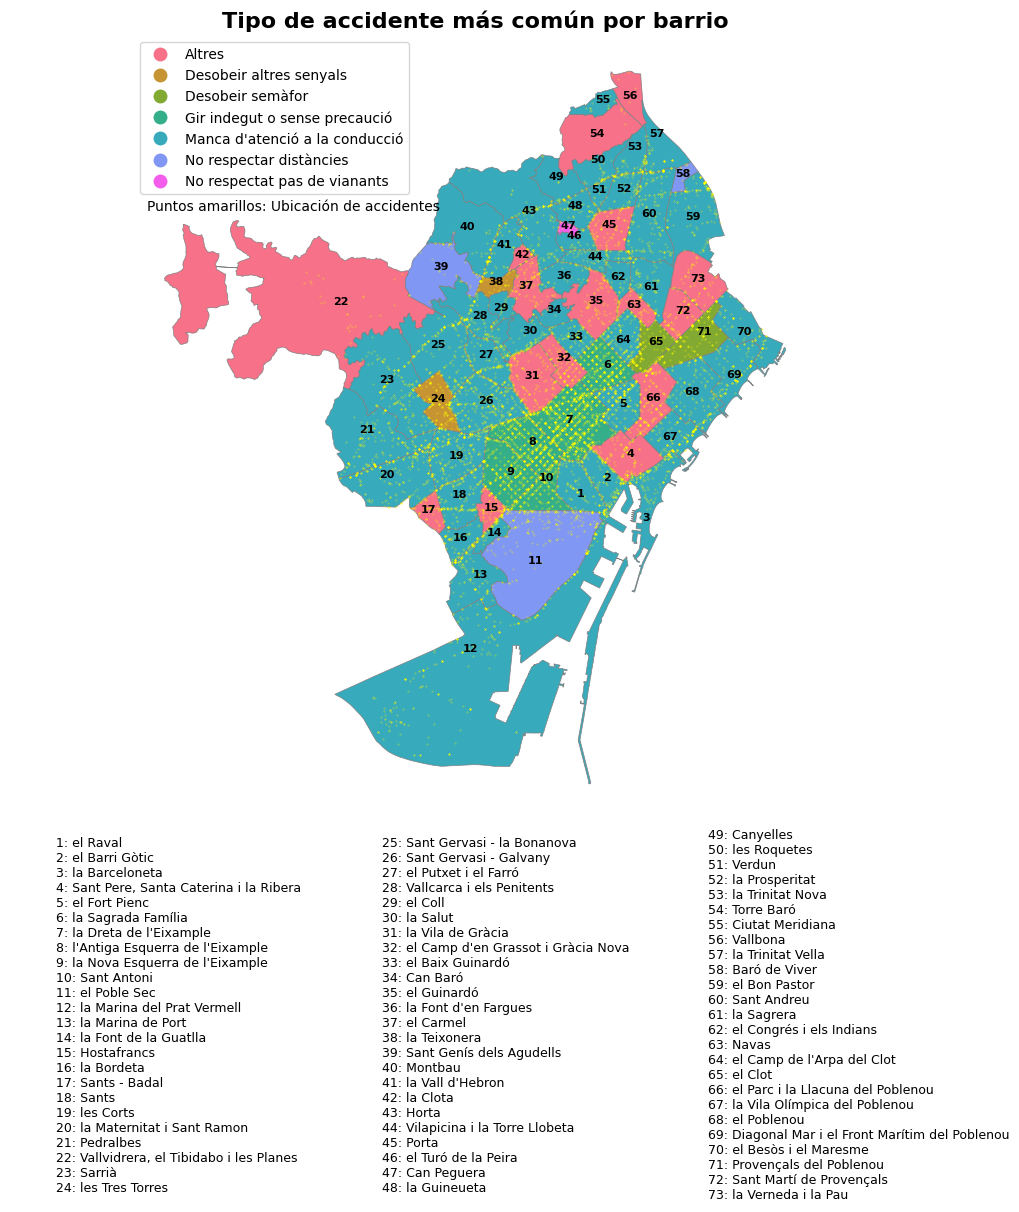

In [19]:
# Leemos el archivo de los barrios
barrios = pd.read_csv('data/BarcelonaCiutat_Barris.csv')

def show_map(df, barrios_df, title):
    # Convertir a GeoDataFrame
    gdf = gpd.GeoDataFrame(df, geometry=gpd.GeoSeries.from_wkt(barrios_df['geometria_wgs84']))
    gdf.set_crs(epsg=4326, inplace=True)

    # Agregar etiquetas con el nombre del barrio
    gdf['coords'] = gdf['geometry'].apply(lambda x: x.representative_point().coords[:])
    gdf['coords'] = [coords[0] for coords in gdf['coords']]
    gdf['label'] = gdf['Codi_Barri']

    # Crear el mapa y un espacio adicional para la leyenda
    _, (ax, ax_legend) = plt.subplots(2, 1, figsize=(12, 14), gridspec_kw={'height_ratios': [4, 1]})

    unique_accident_types = gdf['accidentes_tipo'].unique()
    palette = sns.color_palette("husl", len(unique_accident_types))
    color_dict = {tipo: color for tipo, color in zip(unique_accident_types, palette)}

    # Crear el mapa para los barrios
    gdf.plot(column='accidentes_tipo', ax=ax, legend=True,
             legend_kwds={'bbox_to_anchor': (0, 1), 'loc': 'upper left'},
             cmap=plt.matplotlib.colors.ListedColormap([color_dict[x] for x in unique_accident_types]), edgecolor='grey', linewidth=0.5)

    # Agregar etiquetas al mapa
    for _, row in gdf.iterrows():
        ax.annotate(f"{row['Codi_Barri']}", 
                    xy=row['coords'], horizontalalignment='center', fontsize=8, fontweight='bold')

    # Ajustar estilo del mapa
    ax.set_title(title, fontsize=16, fontweight='bold')
    ax.set_axis_off()

    # Desactivar ejes del espacio adicional y agregar un marco
    ax_legend.axis('off')
    ax_legend.patch.set_edgecolor('black')
    ax_legend.patch.set_linewidth(1)

    # Crear una leyenda o lista de correspondencia en una posición inferior
    leyenda_items = [f"{num}: {nom}" for num, nom in zip(gdf['Codi_Barri'], gdf['Nom_Barri'])]

    # Dividir la leyenda en tres columnas
    tercio = len(leyenda_items) // 3
    leyenda_col1 = "\n".join(leyenda_items[:tercio])
    leyenda_col2 = "\n".join(leyenda_items[tercio:2*tercio])
    leyenda_col3 = "\n".join(leyenda_items[2*tercio:])

    # Agregar la leyenda en tres columnas
    ax_legend.text(0.05, 0.5, leyenda_col1, ha="left", va="center", fontsize=9)
    ax_legend.text(0.4, 0.5, leyenda_col2, ha="left", va="center", fontsize=9)
    ax_legend.text(0.75, 0.5, leyenda_col3, ha="left", va="center", fontsize=9)

    # Agregar puntos amarillos que representan la ubicación de cada accidente
    ax.scatter(mapa_accidentes['Longitud'], mapa_accidentes['Latitud'], s=0.1, c='yellow', alpha=0.5)

    # Añadir anotación explicativa
    ax.text(0.02, 0.79, 'Puntos amarillos: Ubicación de accidentes', ha='left', va='top', transform=ax.transAxes, fontsize=10)

    plt.show()

show_map(alquileres, barrios, 'Tipo de accidente más común por barrio')

### Agregando el dataset de ruido.

In [20]:
mapa_ruido = pd.read_csv('data/2017_poblacio_exposada_barris_mapa_estrategic_soroll_bcn_long.csv')
print("El dataset tiene", mapa_ruido.shape[0], "filas y", mapa_ruido.shape[1], "columnas.\n")
print("Las columnas y sus tipos de datos son:")
print(mapa_ruido.dtypes)

mapa_ruido.head()

El dataset tiene 18980 filas y 7 columnas.

Las columnas y sus tipos de datos son:
Codi_Districte     int64
Nom_Districte     object
Codi_Barri         int64
Nom_Barri         object
Concepte          object
Rang_soroll       object
Valor             object
dtype: object


,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Concepte,Rang_soroll,Valor
0,1,Ciutat Vella,1,el Raval,TOTAL_D,<40 dB,7.73%
1,1,Ciutat Vella,1,el Raval,TOTAL_D,40-45 dB,26.98%
2,1,Ciutat Vella,1,el Raval,TOTAL_D,45-50 dB,7.38%
3,1,Ciutat Vella,1,el Raval,TOTAL_D,50-55 dB,11.97%
4,1,Ciutat Vella,1,el Raval,TOTAL_D,55-60 dB,19.85%


In [21]:
# Explorar los valores únicos en las columnas "Concepte" y "Rang_soroll"
unique_concepte = mapa_ruido['Concepte'].unique()
unique_rang_soroll = mapa_ruido['Rang_soroll'].unique()

print("Valores únicos de la columna Concepte:")
print(unique_concepte)
print("Valores únicos de la columna Rang_soroll:")
print(unique_rang_soroll)

Valores únicos de la columna Concepte:
['TOTAL_D' 'TOTAL_E' 'TOTAL_N' 'TOTAL_DEN' 'TRANSIT_D' 'TRANSIT_E'
 'TRANSIT_N' 'TRANSIT_DEN' 'GI_TR_D' 'GI_TR_E' 'GI_TR_N' 'GI_TR_DEN'
 'FFCC_D' 'FFCC_E' 'FFCC_N' 'FFCC_DEN' 'INDUST_D' 'INDUST_E' 'INDUST_N'
 'INDUST_DEN' 'VIANANTS_D' 'VIANANTS_E' 'OCI_N' 'PATIS_D' 'PATIS_E'
 'PARCS_D']
Valores únicos de la columna Rang_soroll:
['<40 dB' '40-45 dB' '45-50 dB' '50-55 dB' '55-60 dB' '60-65 dB'
 '65-70 dB' '70-75 dB' '75-80 dB' '>=80 dB']


Despues de observar los datos tenemos:

1. **Codi_Districte**: Códigos numéricos para los distritos. Hay 10 valores únicos, lo que sugiere que hay 10 distritos diferentes representados en los datos.

2. **Nom_Districte**: Nombres de los distritos. También hay 10 nombres únicos, lo que concuerda con el número de códigos de distrito.

3. **Codi_Barri**: Códigos numéricos para los barrios. Hay 73 valores únicos, indicando que los datos incluyen 73 barrios diferentes.

4. **Nom_Barri**: Nombres de los barrios. El número de nombres de barrio únicos también es 73, correspondiente al número de códigos de barrio.

5. **Concepte**: Esta columna tiene varios valores únicos que parecen representar diferentes conceptos o categorías relacionadas con el ruido. Algunos ejemplos incluyen 'TOTAL_D', 'TOTAL_E', 'TRANSIT_D', 'FFCC_D', 'INDUST_D', 'VIANANTS_D', entre otros. Estos podrían referirse a diferentes fuentes o tipos de ruido durante diferentes períodos del día (por ejemplo, 'D' podría representar el día, 'E' la tarde, 'N' la noche).

6. **Rang_soroll**: Contiene 10 rangos de niveles de ruido, desde '<40 dB' hasta '>=80 dB'. Esto sugiere que los datos están categorizando niveles de ruido en diferentes rangos para análisis.

7. **Valor**: Contiene porcentajes, pero sin más contexto, no está claro qué representan exactamente estos porcentajes. Podrían estar relacionados con la proporción de la población expuesta a diferentes niveles de ruido en los barrios, pero esto es solo una suposición.

En este dataset habra que limpiar ciertas columnas para poder operar con ellas:

Son: Rang_soroll y Valor.

In [22]:
# Pasamos del string % a un valor entre 0 y 1
def percent_to_float(x):
    return float(x.replace('%', '')) / 100

mapa_ruido['Valor'] = mapa_ruido['Valor'].apply(percent_to_float)

In [23]:
def get_midpoint(range_str):
    range_str = range_str.replace(' dB', '').strip()
    if '-' in range_str:
        # Split the range string and convert to floats
        low, high = map(float, range_str.split('-'))
        # Return the midpoint
        return (low + high) / 2
    elif '<' in range_str:
        # Handle the case where the range is something like '<40'
        return float(range_str.replace('<', ''))
    elif '>=' in range_str:
        # Handle the case where the range is something like '>=80'
        return float(range_str.replace('>=', ''))
    else:
        # If the format is not recognized, return None
        return None

def norm(x):
    # Aplicar la normalización a los valores ajustados
    return (x - 40) / (80 - 40)

mapa_ruido['Rang_soroll'] = mapa_ruido['Rang_soroll'].apply(get_midpoint)

In [24]:
mapa_ruido['Rang_soroll_norm'] = norm(mapa_ruido['Rang_soroll'])

In [25]:
ruido_dia   = mapa_ruido[mapa_ruido['Concepte'] == 'TOTAL_D']
ruido_tarde = mapa_ruido[mapa_ruido['Concepte'] == 'TOTAL_E']
ruido_noche = mapa_ruido[mapa_ruido['Concepte'] == 'TOTAL_N']

In [26]:
barrios_sonido = mapa_ruido['Codi_Barri'].unique()
indice_sonido_dia = {}
indice_sonido_tarde = {}
indice_sonido_noche = {}
for barrio in barrios_sonido:
    # Suma ponderada de midpoint_norm y valor por barrio
    indice_sonido_dia[barrio] = (ruido_dia[ruido_dia['Codi_Barri'] == barrio]['Rang_soroll_norm'] * ruido_dia[ruido_dia['Codi_Barri'] == barrio]['Valor']).sum()
    indice_sonido_tarde[barrio] = (ruido_tarde[ruido_tarde['Codi_Barri'] == barrio]['Rang_soroll_norm'] * ruido_tarde[ruido_tarde['Codi_Barri'] == barrio]['Valor']).sum()
    indice_sonido_noche[barrio] = (ruido_noche[ruido_noche['Codi_Barri'] == barrio]['Rang_soroll_norm'] * ruido_noche[ruido_noche['Codi_Barri'] == barrio]['Valor']).sum()

indice_final = {}
for barrio in barrios_sonido:
    indice_final[barrio] = (indice_sonido_dia[barrio] * 0.2 + indice_sonido_tarde[barrio] * 0.3 + indice_sonido_noche[barrio] * 0.5)

In [27]:
alquileres['Indice_Sonido_Dia'] = alquileres['Codi_Barri'].map(indice_sonido_dia)
alquileres['Indice_Sonido_Tarde'] = alquileres['Codi_Barri'].map(indice_sonido_tarde)
alquileres['Indice_Sonido_Noche'] = alquileres['Codi_Barri'].map(indice_sonido_noche)

alquileres['Indice_Sonido'] = alquileres['Codi_Barri'].map(indice_final)

En este análisis, se calculan índices de sonido para diferentes barrios y diferentes momentos del día (día, tarde, noche), y luego se combina en un índice final. La fórmula general utilizada en este código se puede describir de la siguiente manera:

Para cada barrio:

1. **Índice de Sonido (Día, Tarde, Noche):**

   $$
   \text{Índice}_{\text{Sonido}}^{\text{(momento del día)}} = \sum (\text{Rang\_soroll\_norm} \times \text{valor})
   $$
   
   Donde:
   - $\text{Rang\_soroll\_norm}$ es la normalización del rango de sonido para cada registro en el barrio.
   - $\text{valor}$ es el porcentaje de personas afectadas por ese rango de sonido en el barrio.
   - La suma se realiza sobre todos los registros correspondientes a ese barrio y momento del día (día, tarde, noche).

2. **Índice Final:**

   $$
   \text{Índice}_{\text{Final}} = (\text{Índice}_{\text{Sonido}}^{\text{Día}} \times 0.2) + (\text{Índice}_{\text{Sonido}}^{\text{Tarde}} \times 0.3) + (\text{Índice}_{\text{Sonido}}^{\text{Noche}} \times 0.5)
   $$

   Donde:
   - $\text{Índice}_{\text{Sonido}}^{\text{Día}}$, $\text{Índice}_{\text{Sonido}}^{\text{Tarde}}$, $\text{Índice}_{\text{Sonido}}^{\text{Noche}}$ son los índices calculados para día, tarde y noche respectivamente.
   - Estos índices se ponderan con factores de 0.2, 0.3 y 0.5 respectivamente y se suman para obtener el índice final para cada barrio.

En resumen, la fórmula combina ponderadamente los índices de sonido de día, tarde y noche, donde el índice de cada momento del día es una suma ponderada de los niveles de sonido normalizados y el porcentaje de personas afectadas en cada barrio.


In [28]:
# Mostramos los 10 barrios con mayor índice de ruido
alquileres[['Nom_Barri', 'Indice_Sonido']].sort_values(by='Indice_Sonido', ascending=False).head(10)

,Nom_Barri,Indice_Sonido
7,l'Antiga Esquerra de l'Eixample,0.415671
6,la Dreta de l'Eixample,0.409665
5,la Sagrada Família,0.381841
4,el Fort Pienc,0.381101
64,el Clot,0.380747
8,la Nova Esquerra de l'Eixample,0.373321
70,Provençals del Poblenou,0.369321
9,Sant Antoni,0.363630
65,el Parc i la Llacuna del Poblenou,0.362168
68,Diagonal Mar i el Front Marítim del Poblenou,0.361484


In [29]:
alquileres[['Nom_Barri', 'Indice_Sonido']].sort_values(by='Indice_Sonido', ascending=True).head(10)

,Nom_Barri,Indice_Sonido
21,"Vallvidrera, el Tibidabo i les Planes",0.145577
35,la Font d'en Fargues,0.189120
39,Montbau,0.206540
33,Can Baró,0.218057
58,el Bon Pastor,0.219977
48,Canyelles,0.220837
38,Sant Genís dels Agudells,0.220973
49,les Roquetes,0.225123
45,el Turó de la Peira,0.225195
11,la Marina del Prat Vermell,0.225543


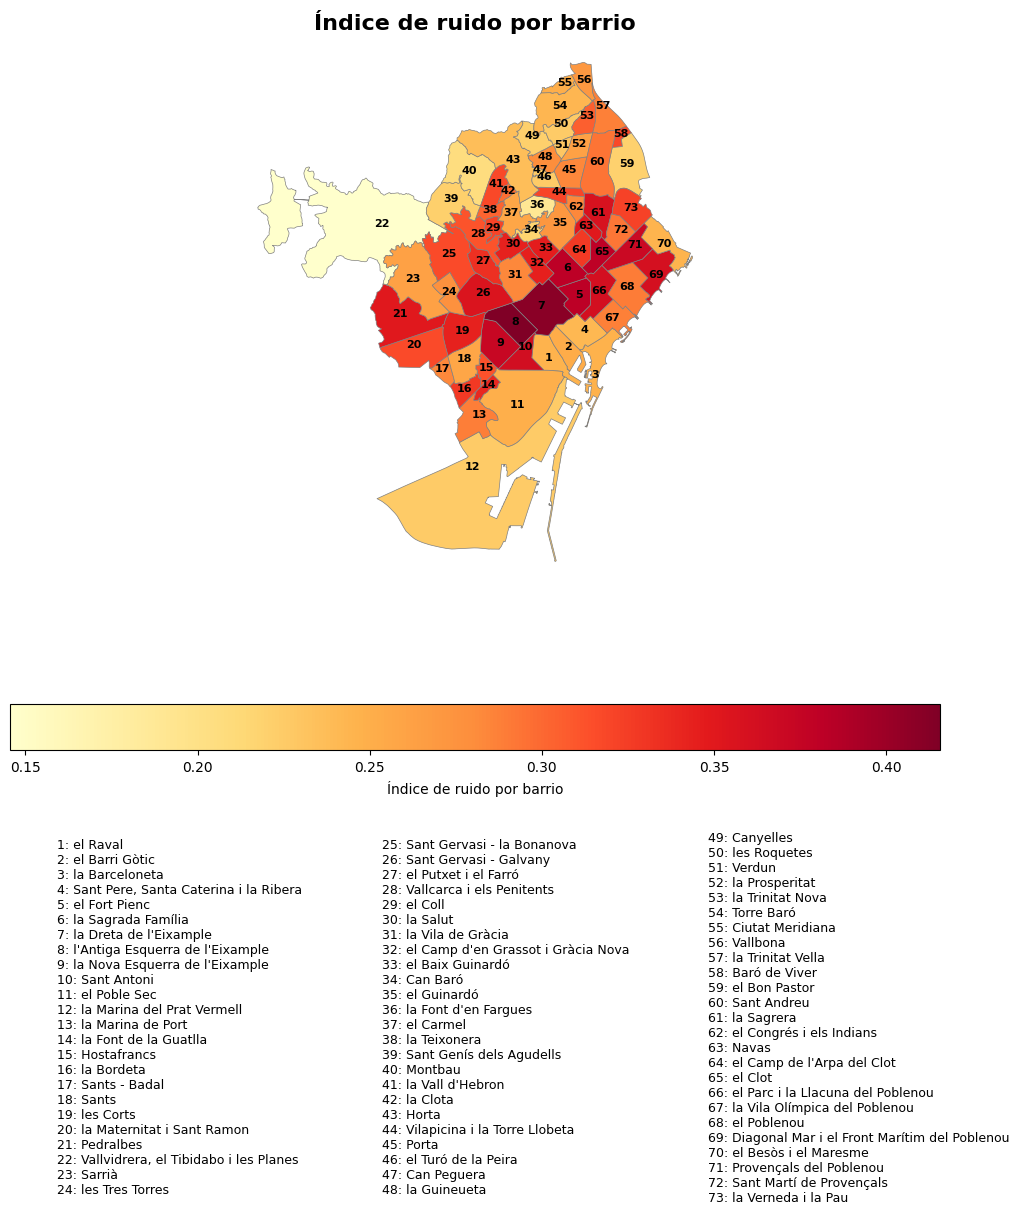

In [30]:
def show_map(df, barrios_df, column_show, title):
    # Convertir a GeoDataFrame
    gdf = gpd.GeoDataFrame(df, geometry=gpd.GeoSeries.from_wkt(barrios_df['geometria_wgs84']))
    gdf.set_crs(epsg=4326, inplace=True)

    # Agregar etiquetas con el nombre del barrio
    gdf['coords'] = gdf['geometry'].apply(lambda x: x.representative_point().coords[:])
    gdf['coords'] = [coords[0] for coords in gdf['coords']]
    gdf['label'] = gdf['Codi_Barri']

    # Crear el mapa y un espacio adicional para la leyenda
    _, (ax, ax_legend) = plt.subplots(2, 1, figsize=(12, 14), gridspec_kw={'height_ratios': [4, 1]})

    # Crear el mapa para los barrios
    gdf.plot(column=column_show, ax=ax, legend=True,
             legend_kwds={'label': title, 'orientation': 'horizontal'},
             cmap='YlOrRd', edgecolor='grey', linewidth=0.5)

    # Agregar etiquetas al mapa
    for _, row in gdf.iterrows():
        ax.annotate(str(row['Codi_Barri']), xy=row['coords'], horizontalalignment='center', fontsize=8, fontweight='bold')

    # Ajustar estilo del mapa
    ax.set_title(title, fontsize=16, fontweight='bold')
    ax.set_axis_off()

    # Crear una leyenda o lista de correspondencia en una posición inferior
    leyenda_items = [f"{num}: {nom}" for num, nom in zip(gdf['Codi_Barri'], gdf['Nom_Barri'])]

    # Dividir la leyenda en tres columnas
    tercio = len(leyenda_items) // 3
    leyenda_col1 = "\n".join(leyenda_items[:tercio])
    leyenda_col2 = "\n".join(leyenda_items[tercio:2*tercio])
    leyenda_col3 = "\n".join(leyenda_items[2*tercio:])

    # Desactivar ejes del espacio adicional y agregar un marco
    ax_legend.axis('off')
    ax_legend.patch.set_edgecolor('black')
    ax_legend.patch.set_linewidth(1)

    # Agregar la leyenda en tres columnas
    ax_legend.text(0.05, 0.5, leyenda_col1, ha="left", va="center", fontsize=9)
    ax_legend.text(0.4, 0.5, leyenda_col2, ha="left", va="center", fontsize=9)
    ax_legend.text(0.75, 0.5, leyenda_col3, ha="left", va="center", fontsize=9)

    plt.show()

show_map(alquileres, barrios, 'Indice_Sonido', 'Índice de ruido por barrio')

In [31]:
alquileres.columns

Index(['Codi_Districte', 'Nom_Districte', 'Codi_Barri', 'Nom_Barri',
       'Preu (Euros/mes) T1', 'Preu (Euros/mes) T2', 'Preu (Euros/mes) T3',
       'Preu (Euros/mes) T4', 'Preu (Euros/m2 mes) T1',
       'Preu (Euros/m2 mes) T2', 'Preu (Euros/m2 mes) T3',
       'Preu (Euros/m2 mes) T4', 'Preu (Euros/mes) Mean',
       'Preu (Euros/mes) Std', 'Preu (Euros/m2 mes) Mean',
       'Preu (Euros/m2 mes) Std', 'Infraccion_gravedad', 'accidentes_mati',
       'accidentes_tarde', 'accidentes_nit', 'accidentes', 'accidentes_tipo',
       'accidentes_tipo_count', 'Indice_Sonido_Dia', 'Indice_Sonido_Tarde',
       'Indice_Sonido_Noche', 'Indice_Sonido'],
      dtype='object')

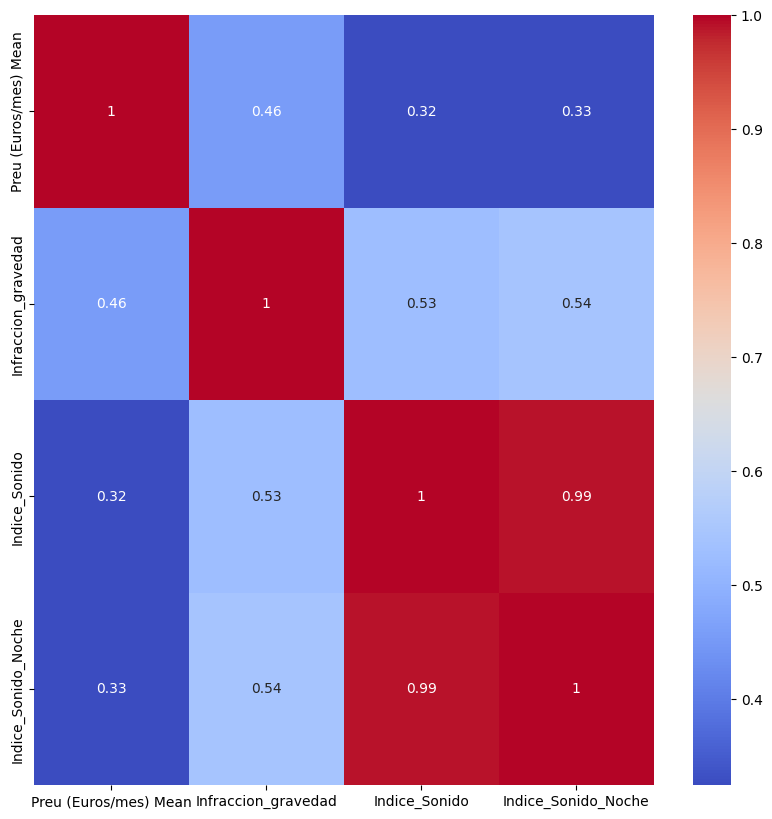

In [32]:
# Muestra las correlaciones entre las variables siguientes
plt.figure(figsize=(10, 10))
sns.heatmap(alquileres[['Preu (Euros/mes) Mean', 'Infraccion_gravedad', 'Indice_Sonido', 'Indice_Sonido_Noche']].select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')
plt.show()

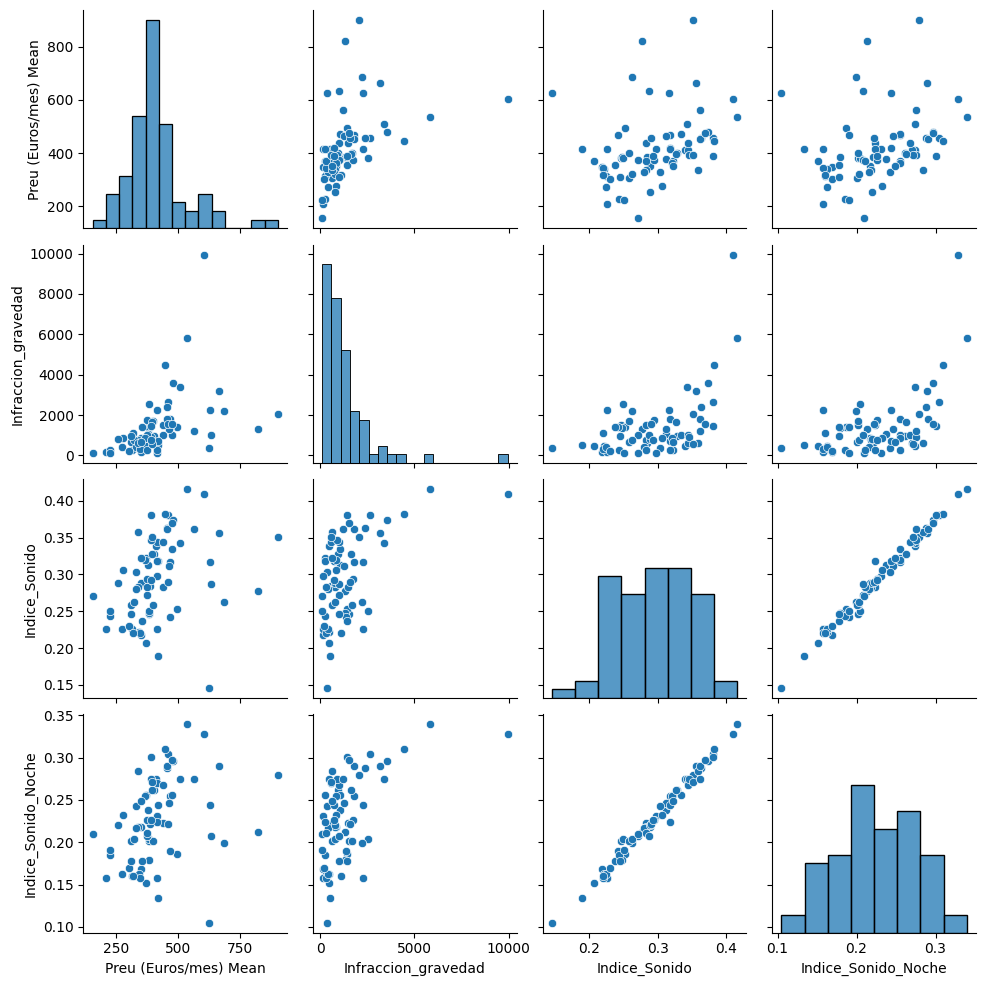

In [34]:
sns.pairplot(alquileres[['Preu (Euros/mes) Mean', 'Infraccion_gravedad', 'Indice_Sonido', 'Indice_Sonido_Noche']].select_dtypes(include=['number']))

Una vez realizado todo el preprocesamiento. Podemos empezar a responder las preguntas propuestas en los objetivos.

¿Qué barrios son los más caros y más baratos de Barcelona?

Para poder contestar esta pregunta lo haremos mostrando un mapa indicando el precio de cada barrio.

Nom_Barri,Preu (Euros/mes) Mean
Pedralbes,901.01375
les Tres Torres,822.01750
Sarrià,685.49125
Sant Gervasi - Galvany,663.48375
la Vila Olímpica del Poblenou,632.68375


Nom_Barri,Preu (Euros/mes) Mean
Vallbona,153.485000
Can Peguera,209.450000
Ciutat Meridiana,221.795000
Torre Baró,225.123333
la Trinitat Vella,254.740000


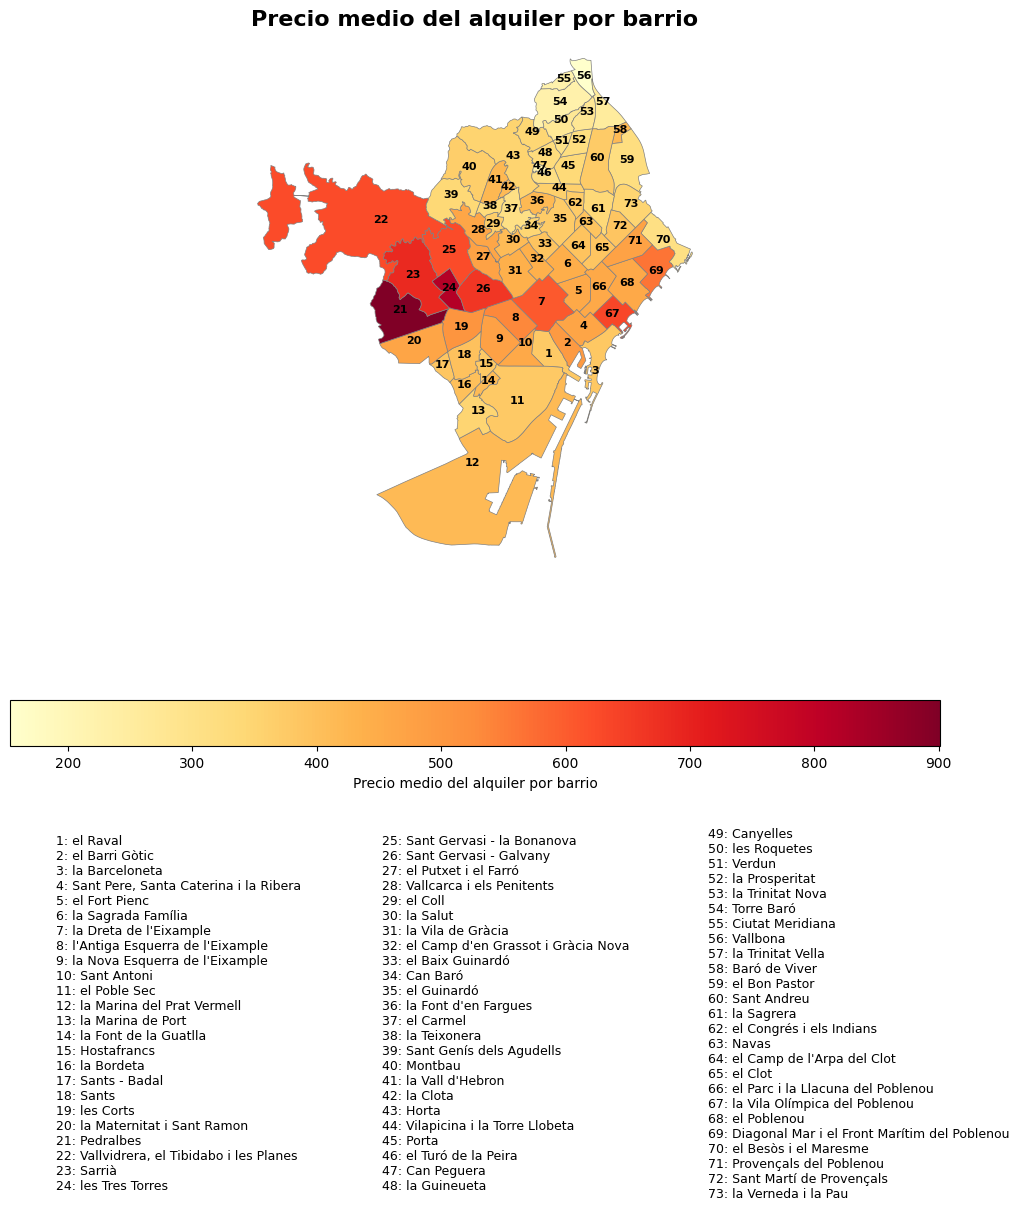

In [73]:
from IPython.display import display, HTML

def show_map(df, barrios_df, column_show, title):
    # Convertir a GeoDataFrame
    gdf = gpd.GeoDataFrame(df, geometry=gpd.GeoSeries.from_wkt(barrios_df['geometria_wgs84']))
    gdf.set_crs(epsg=4326, inplace=True)

    # Agregar etiquetas con el nombre del barrio
    gdf['coords'] = gdf['geometry'].apply(lambda x: x.representative_point().coords[:])
    gdf['coords'] = [coords[0] for coords in gdf['coords']]
    gdf['label'] = gdf['Codi_Barri']

    # Crear el mapa y un espacio adicional para la leyenda
    _, (ax, ax_legend) = plt.subplots(2, 1, figsize=(12, 14), gridspec_kw={'height_ratios': [4, 1]})

    # Crear el mapa para los barrios
    gdf.plot(column=column_show, ax=ax, legend=True,
             legend_kwds={'label': title, 'orientation': 'horizontal'},
             cmap='YlOrRd', edgecolor='grey', linewidth=0.5)

    # Agregar etiquetas al mapa
    for _, row in gdf.iterrows():
        ax.annotate(str(row['Codi_Barri']), xy=row['coords'], horizontalalignment='center', fontsize=8, fontweight='bold')

    # Ajustar estilo del mapa
    ax.set_title(title, fontsize=16, fontweight='bold')
    ax.set_axis_off()

    # Crear una leyenda o lista de correspondencia en una posición inferior
    leyenda_items = [f"{num}: {nom}" for num, nom in zip(gdf['Codi_Barri'], gdf['Nom_Barri'])]

    # Dividir la leyenda en tres columnas
    tercio = len(leyenda_items) // 3
    leyenda_col1 = "\n".join(leyenda_items[:tercio])
    leyenda_col2 = "\n".join(leyenda_items[tercio:2*tercio])
    leyenda_col3 = "\n".join(leyenda_items[2*tercio:])

    # Desactivar ejes del espacio adicional y agregar un marco
    ax_legend.axis('off')
    ax_legend.patch.set_edgecolor('black')
    ax_legend.patch.set_linewidth(1)

    # Agregar la leyenda en tres columnas
    ax_legend.text(0.05, 0.5, leyenda_col1, ha="left", va="center", fontsize=9)
    ax_legend.text(0.4, 0.5, leyenda_col2, ha="left", va="center", fontsize=9)
    ax_legend.text(0.75, 0.5, leyenda_col3, ha="left", va="center", fontsize=9)

    # Muestra una tabla con los valores de las variables nombre de barrio
    display(HTML(f"<h3>{title} Valores mas altos</h3>"))
    display(HTML(df[['Nom_Barri', column_show]].sort_values(by=column_show, ascending=False).head(5).to_html(index=False)))

    # Ahora los mas bajos
    display(HTML(f"<h3>{title} Valores mas bajos</h3>"))
    display(HTML(df[['Nom_Barri', column_show]].sort_values(by=column_show, ascending=True).head(5).to_html(index=False)))

    plt.show()

show_map(alquileres, barrios, 'Preu (Euros/mes) Mean', 'Precio medio del alquiler por barrio')

¿El ruido tiene un impacto en el precio del alquiler?

Para poder ver esto necesitamos calcular si hay una correlacion positivo o negativa notable entre la variable del precio y la del indice del ruido que hemos calculado anteriormente.

<Axes: title={'center': 'Correlación entre el precio medio del alquiler y el índice de ruido en los periodos diurno, vespertino y nocturno'}>

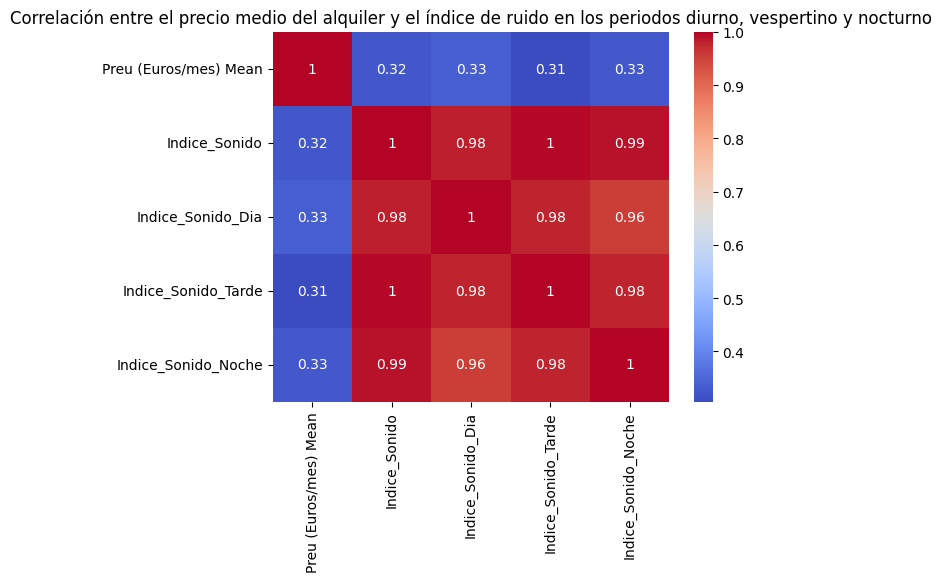

In [51]:
plt.title('Correlación entre el precio medio del alquiler y el índice de ruido en los periodos diurno, vespertino y nocturno')
sns.heatmap(alquileres[['Preu (Euros/mes) Mean', 'Indice_Sonido', 'Indice_Sonido_Dia', 'Indice_Sonido_Tarde', 'Indice_Sonido_Noche']].select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')

**¿En qué barrio tendremos un peor descanso por culpa del ruido?**

Para ello necesitamos mirar el mapa de los barrios en base al indice de ruido por la noche que hemos calculado anteriormente.

Nom_Barri,Indice_Sonido_Noche
l'Antiga Esquerra de l'Eixample,0.339600
la Dreta de l'Eixample,0.328319
la Sagrada Família,0.309525
el Fort Pienc,0.304300
el Clot,0.300975


Nom_Barri,Indice_Sonido_Noche
"Vallvidrera, el Tibidabo i les Planes",0.105000
la Font d'en Fargues,0.133525
Montbau,0.151706
Can Peguera,0.157437
la Marina del Prat Vermell,0.157438


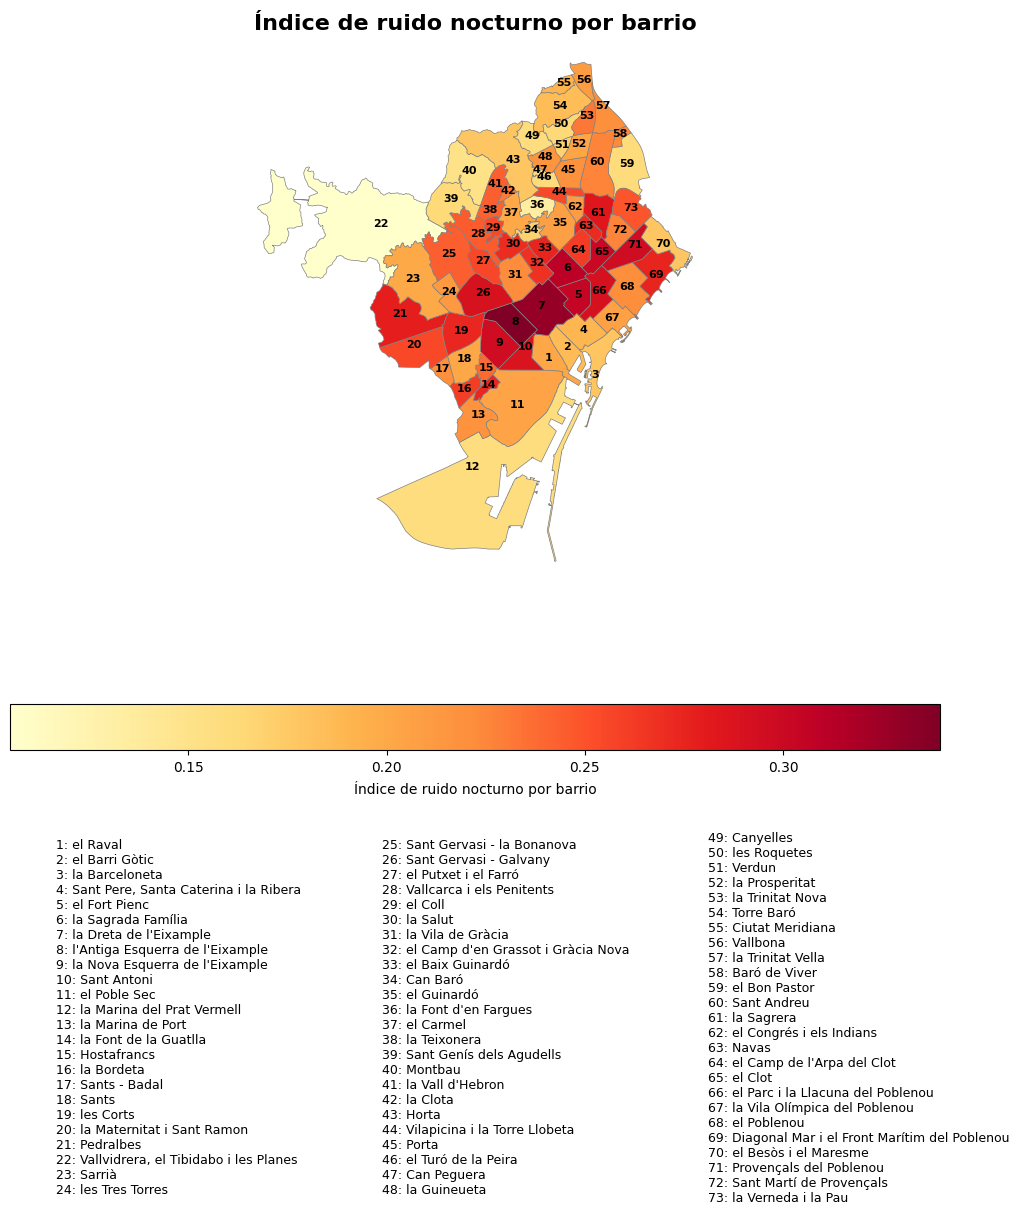

In [52]:
show_map(alquileres, barrios, 'Indice_Sonido_Noche', 'Índice de ruido nocturno por barrio')

**¿Hay una relación clara entre la cantidad de accidentes y el precio del alquiler? ¿Y sobre el ruido?**

Para ello hay que calcular de nuevo una matriz de correlacion con las variables que entran en juego.

In [53]:
alquileres.columns

Index(['Codi_Districte', 'Nom_Districte', 'Codi_Barri', 'Nom_Barri',
       'Preu (Euros/mes) T1', 'Preu (Euros/mes) T2', 'Preu (Euros/mes) T3',
       'Preu (Euros/mes) T4', 'Preu (Euros/m2 mes) T1',
       'Preu (Euros/m2 mes) T2', 'Preu (Euros/m2 mes) T3',
       'Preu (Euros/m2 mes) T4', 'Preu (Euros/mes) Mean',
       'Preu (Euros/mes) Std', 'Preu (Euros/m2 mes) Mean',
       'Preu (Euros/m2 mes) Std', 'Infraccion_gravedad', 'accidentes_mati',
       'accidentes_tarde', 'accidentes_nit', 'accidentes', 'accidentes_tipo',
       'accidentes_tipo_count', 'Indice_Sonido_Dia', 'Indice_Sonido_Tarde',
       'Indice_Sonido_Noche', 'Indice_Sonido'],
      dtype='object')

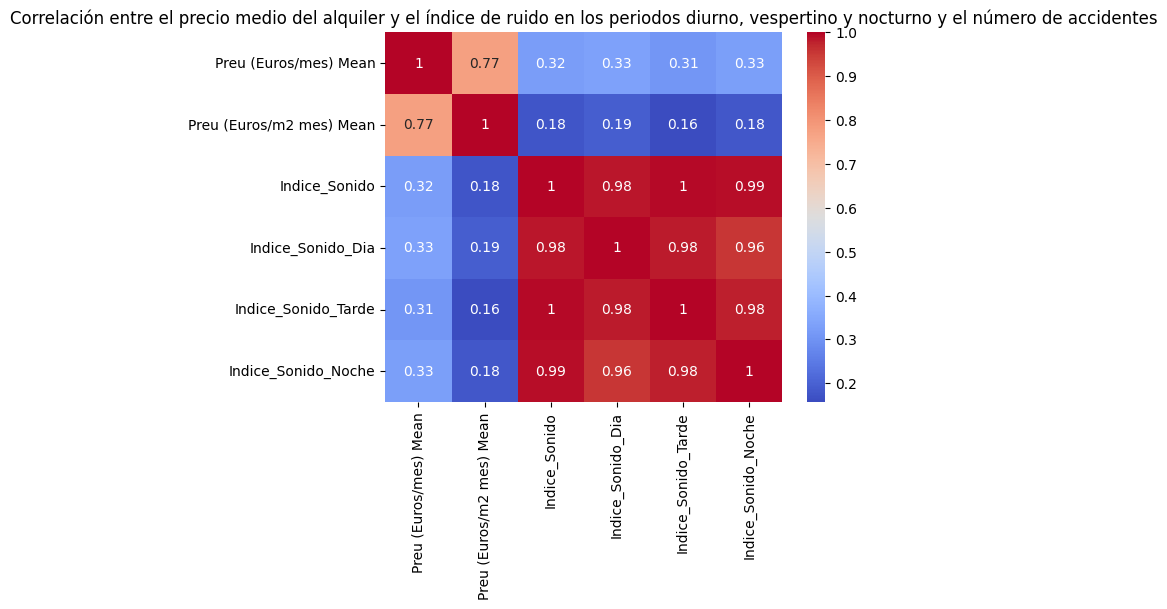

In [66]:
plt.title('Correlación entre el precio medio del alquiler y el índice de ruido en los periodos diurno, vespertino y nocturno y el número de accidentes')
sns.heatmap(alquileres[['Preu (Euros/mes) Mean', 'Preu (Euros/m2 mes) Mean', 'Indice_Sonido', 'Indice_Sonido_Dia', 'Indice_Sonido_Tarde', 'Indice_Sonido_Noche']].select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')
plt.show()

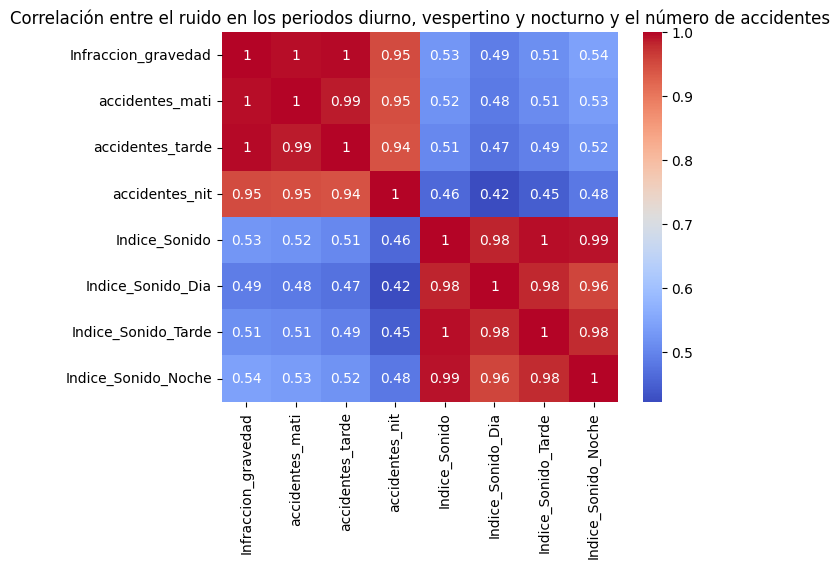

In [68]:
plt.title('Correlación entre el ruido en los periodos diurno, vespertino y nocturno y el número de accidentes')
sns.heatmap(alquileres[['Infraccion_gravedad', 'accidentes_mati', 'accidentes_tarde', 'accidentes_nit', 'Indice_Sonido', 'Indice_Sonido_Dia', 'Indice_Sonido_Tarde', 'Indice_Sonido_Noche']].select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')
plt.show()

**¿Qué tipo de accidentes son más comunes en los distintos tipos de barrios?**

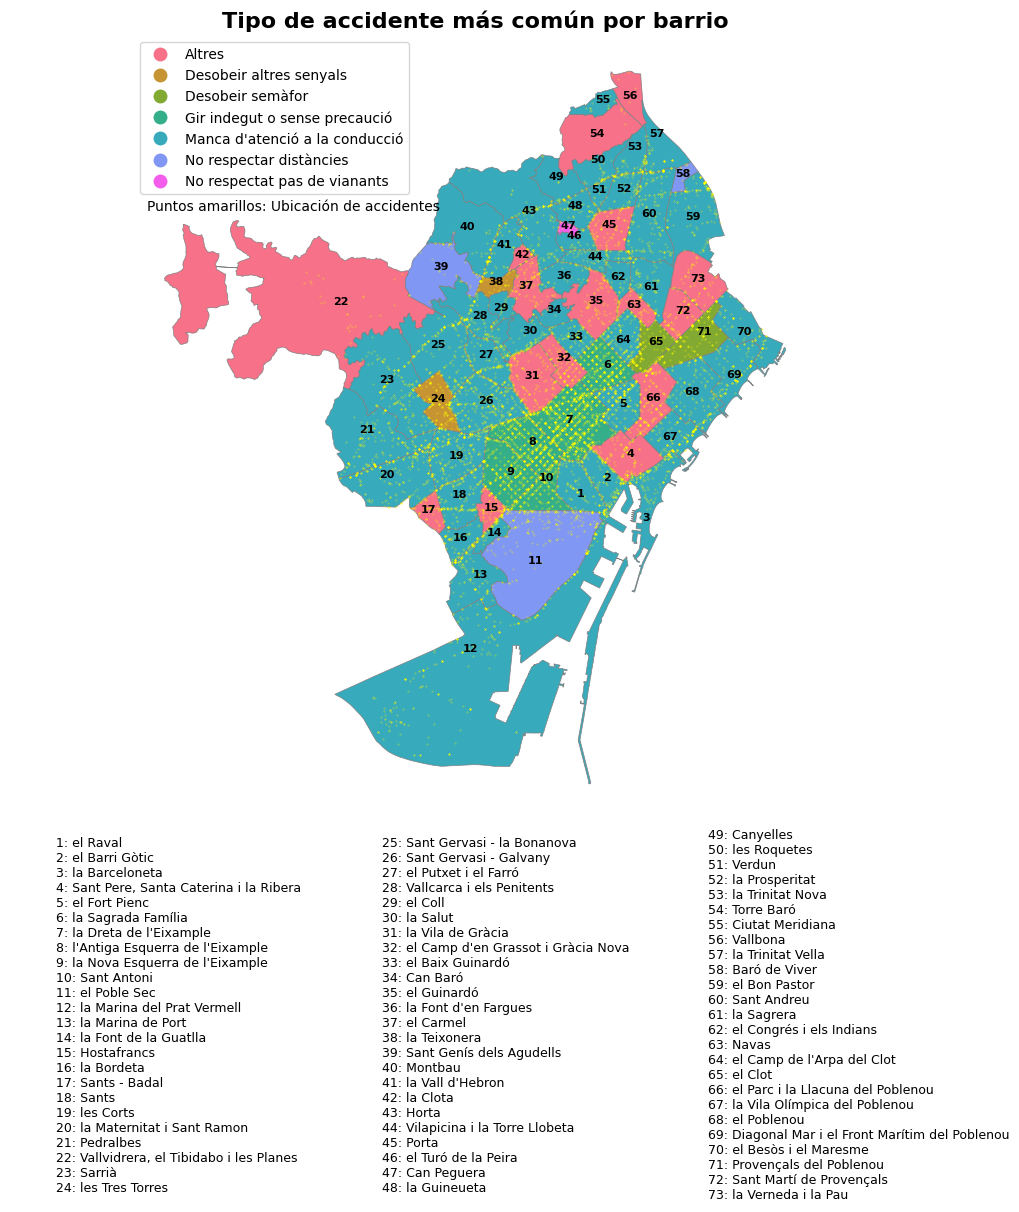

In [69]:
# Leemos el archivo de los barrios
barrios = pd.read_csv('data/BarcelonaCiutat_Barris.csv')

def show_map_accidentes(df, barrios_df, title):
    # Convertir a GeoDataFrame
    gdf = gpd.GeoDataFrame(df, geometry=gpd.GeoSeries.from_wkt(barrios_df['geometria_wgs84']))
    gdf.set_crs(epsg=4326, inplace=True)

    # Agregar etiquetas con el nombre del barrio
    gdf['coords'] = gdf['geometry'].apply(lambda x: x.representative_point().coords[:])
    gdf['coords'] = [coords[0] for coords in gdf['coords']]
    gdf['label'] = gdf['Codi_Barri']

    # Crear el mapa y un espacio adicional para la leyenda
    _, (ax, ax_legend) = plt.subplots(2, 1, figsize=(12, 14), gridspec_kw={'height_ratios': [4, 1]})

    unique_accident_types = gdf['accidentes_tipo'].unique()
    palette = sns.color_palette("husl", len(unique_accident_types))
    color_dict = {tipo: color for tipo, color in zip(unique_accident_types, palette)}

    # Crear el mapa para los barrios
    gdf.plot(column='accidentes_tipo', ax=ax, legend=True,
             legend_kwds={'bbox_to_anchor': (0, 1), 'loc': 'upper left'},
             cmap=plt.matplotlib.colors.ListedColormap([color_dict[x] for x in unique_accident_types]), edgecolor='grey', linewidth=0.5)

    # Agregar etiquetas al mapa
    for _, row in gdf.iterrows():
        ax.annotate(f"{row['Codi_Barri']}", 
                    xy=row['coords'], horizontalalignment='center', fontsize=8, fontweight='bold')

    # Ajustar estilo del mapa
    ax.set_title(title, fontsize=16, fontweight='bold')
    ax.set_axis_off()

    # Desactivar ejes del espacio adicional y agregar un marco
    ax_legend.axis('off')
    ax_legend.patch.set_edgecolor('black')
    ax_legend.patch.set_linewidth(1)

    # Crear una leyenda o lista de correspondencia en una posición inferior
    leyenda_items = [f"{num}: {nom}" for num, nom in zip(gdf['Codi_Barri'], gdf['Nom_Barri'])]

    # Dividir la leyenda en tres columnas
    tercio = len(leyenda_items) // 3
    leyenda_col1 = "\n".join(leyenda_items[:tercio])
    leyenda_col2 = "\n".join(leyenda_items[tercio:2*tercio])
    leyenda_col3 = "\n".join(leyenda_items[2*tercio:])

    # Agregar la leyenda en tres columnas
    ax_legend.text(0.05, 0.5, leyenda_col1, ha="left", va="center", fontsize=9)
    ax_legend.text(0.4, 0.5, leyenda_col2, ha="left", va="center", fontsize=9)
    ax_legend.text(0.75, 0.5, leyenda_col3, ha="left", va="center", fontsize=9)

    # Agregar puntos amarillos que representan la ubicación de cada accidente
    ax.scatter(mapa_accidentes['Longitud'], mapa_accidentes['Latitud'], s=0.1, c='yellow', alpha=0.5)

    # Añadir anotación explicativa
    ax.text(0.02, 0.79, 'Puntos amarillos: Ubicación de accidentes', ha='left', va='top', transform=ax.transAxes, fontsize=10)

    plt.show()

show_map_accidentes(alquileres, barrios, 'Tipo de accidente más común por barrio')

**¿Cual es el mejor barrio para vivir dependiendo el alquiler, ruido y accidentes?**

Para poder dar respuesta a esta pregunta, necesitamos valorar las preferencias de cada uno. Para ello vamos a poner varios casos.

- No importa el dinero, queremos un el mejor lugar (poco ruido y pocos accidentes).
- Importa el dinero y queremos un lugar con poco ruido.
- Importa el dinero y queremos un lugar con pocos accidentes.

Para ello tenemos que crear tres indices basados en nuestras preferencias.

# Cálculo del Índice de Calidad de Vida

Primero, normalizamos las variables de interés, que son 'Preu (Euros/mes) Mean', 'Indice_Sonido' y 'Infraccion_gravedad' utilizando el método Min-Max. Este método transforma los datos en una escala de 0 a 1. La fórmula aplicada para cada valor es:

$$ x'_{ij} = \frac{x_{ij} - \min(x_{j})}{\max(x_{j}) - \min(x_{j})} $$

donde:
- $ x_{ij} $ es el valor original de la característica $ j $ en la muestra $ i $,
- $ \min(x_{j}) $ y $ \max(x_{j}) $ son el valor mínimo y máximo de la característica $ j $ en el conjunto de datos, respectivamente.

Luego, calculamos un 'índice' de calidad de vida basado en una ponderación de estas variables normalizadas. Dicha ponderación refleja la importancia relativa que queremos dar a cada variable. La fórmula general para calcular este índice es:

$$ \text{indice}_i = 1 - \sum_{j=1}^{n} w_{j} \cdot x'_{ij} $$

con $ w_{j} $ representando la ponderación de la variable $ j $, y $ x'_{ij} $ el valor normalizado correspondiente.

Hemos considerado diferentes ponderaciones para examinar escenarios distintos donde cada variable tiene diferente relevancia:

1. Índice de calidad de vida priorizando menor importancia al precio del alquiler: $ w = [0.1, 0.45, 0.45] $
2. Índice de calidad de vida priorizando menor importancia al ruido: $ w = [0.45, 0.1, 0.45] $
3. Índice de calidad de vida priorizando menor importancia al número de accidentes: $ w = [0.45, 0.45, 0.1] $
4. Distribución uniforme de la importancia de las variables: $ w = [0.33, 0.33, 0.33] $

Finalmente, representamos visualmente estos índices en un mapa para cada barrio, permitiendo una interpretación geográfica de la calidad de vida según los criterios definidos.


Nom_Barri,indice
"Vallvidrera, el Tibidabo i les Planes",0.926114
la Font d'en Fargues,0.873708
Can Peguera,0.856228
Montbau,0.853503
Can Baró,0.850446


Nom_Barri,indice
la Dreta de l'Eixample,0.049814
l'Antiga Esquerra de l'Eixample,0.237297
la Sagrada Família,0.367832
la Nova Esquerra de l'Eixample,0.418849
Sant Gervasi - Galvany,0.439430


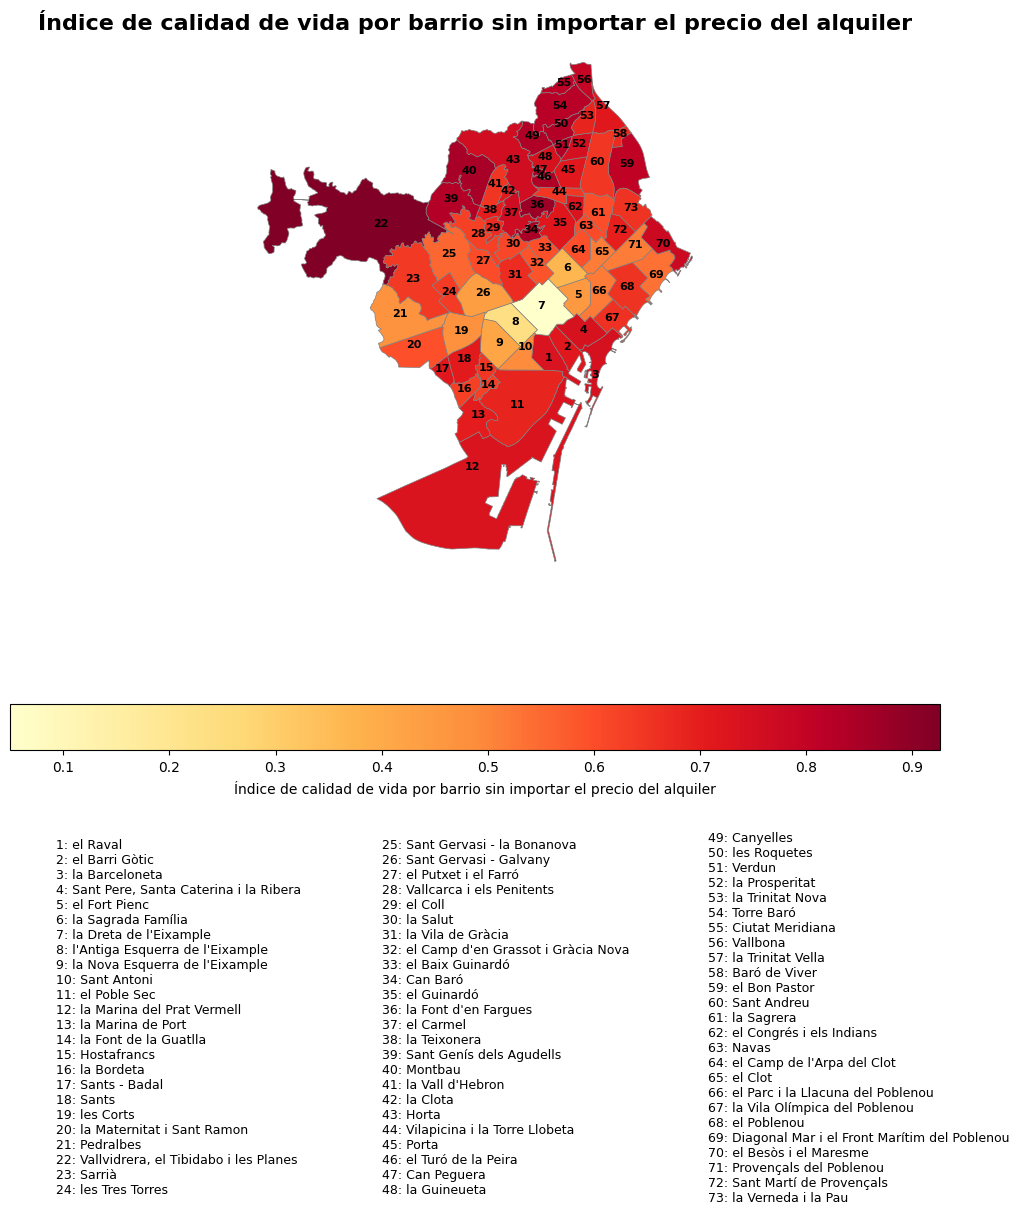

Nom_Barri,indice
Vallbona,0.953287
Can Peguera,0.933892
Ciutat Meridiana,0.920138
Torre Baró,0.914049
les Roquetes,0.884537


Nom_Barri,indice
la Dreta de l'Eixample,0.181362
Pedralbes,0.384516
l'Antiga Esquerra de l'Eixample,0.408668
Sant Gervasi - Galvany,0.473593
les Tres Torres,0.492972


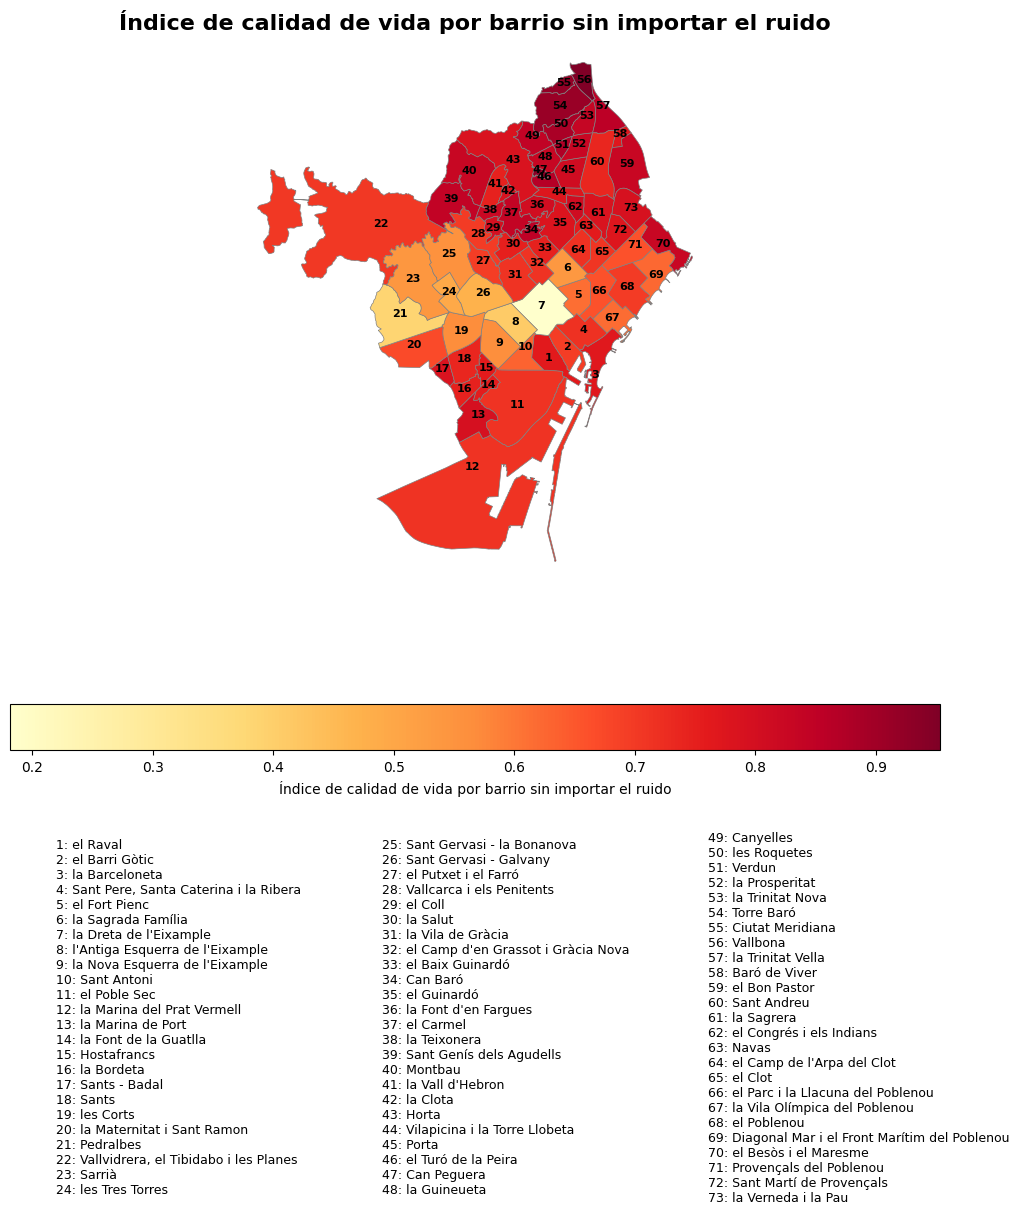

Nom_Barri,indice
Can Peguera,0.832157
les Roquetes,0.792830
Torre Baró,0.792107
Vallbona,0.791355
Ciutat Meridiana,0.784544


Nom_Barri,indice
Pedralbes,0.188016
la Dreta de l'Eixample,0.189144
l'Antiga Esquerra de l'Eixample,0.262186
Sant Gervasi - Galvany,0.310629
les Tres Torres,0.365774


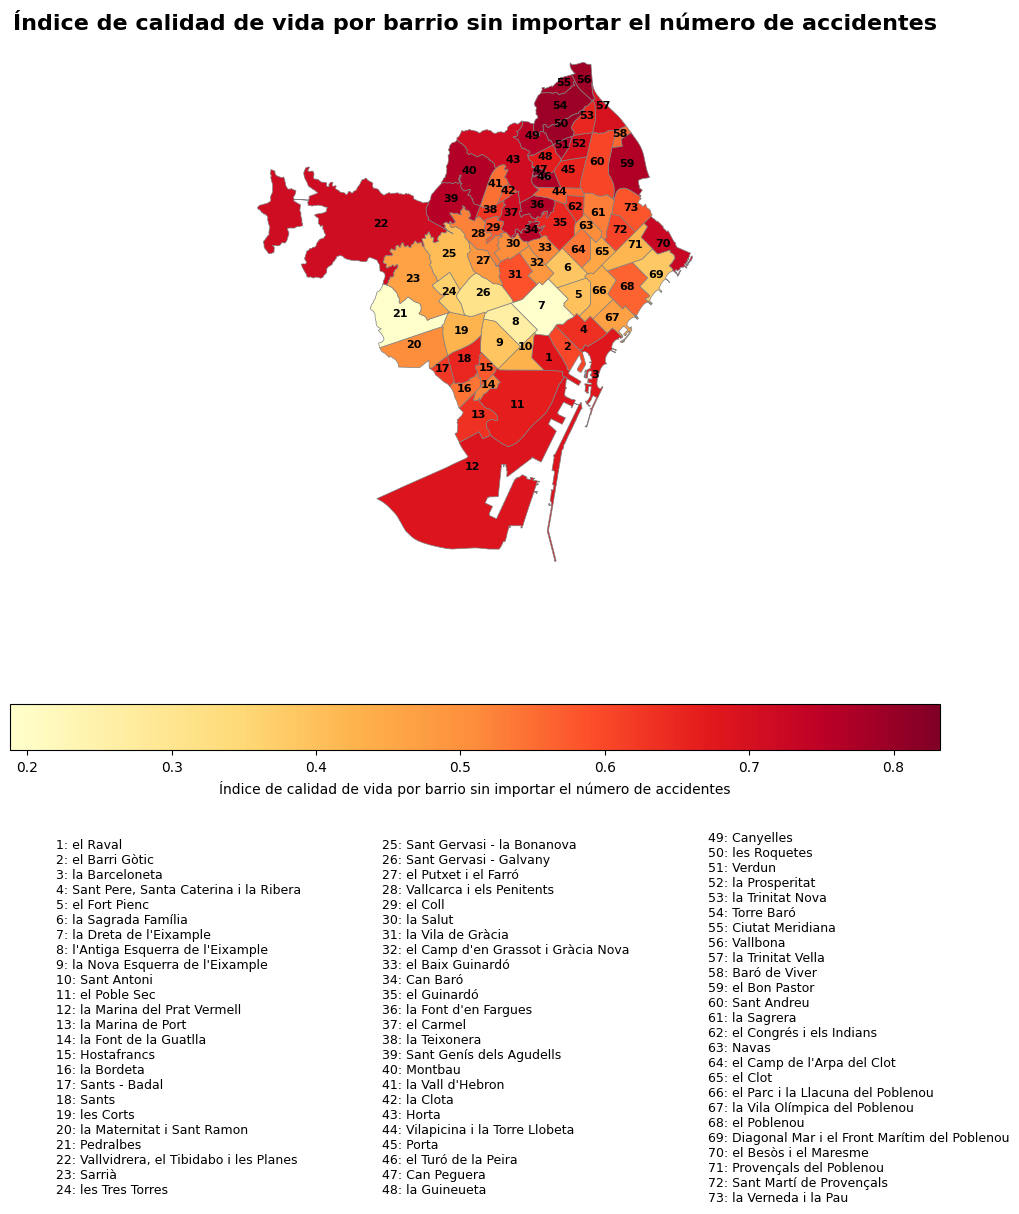

Nom_Barri,indice
Can Peguera,0.875351
Vallbona,0.846785
Torre Baró,0.843818
Ciutat Meridiana,0.841999
les Roquetes,0.839736


Nom_Barri,indice
la Dreta de l'Eixample,0.148706
l'Antiga Esquerra de l'Eixample,0.309690
Pedralbes,0.353519
Sant Gervasi - Galvany,0.413805
la Sagrada Família,0.436655


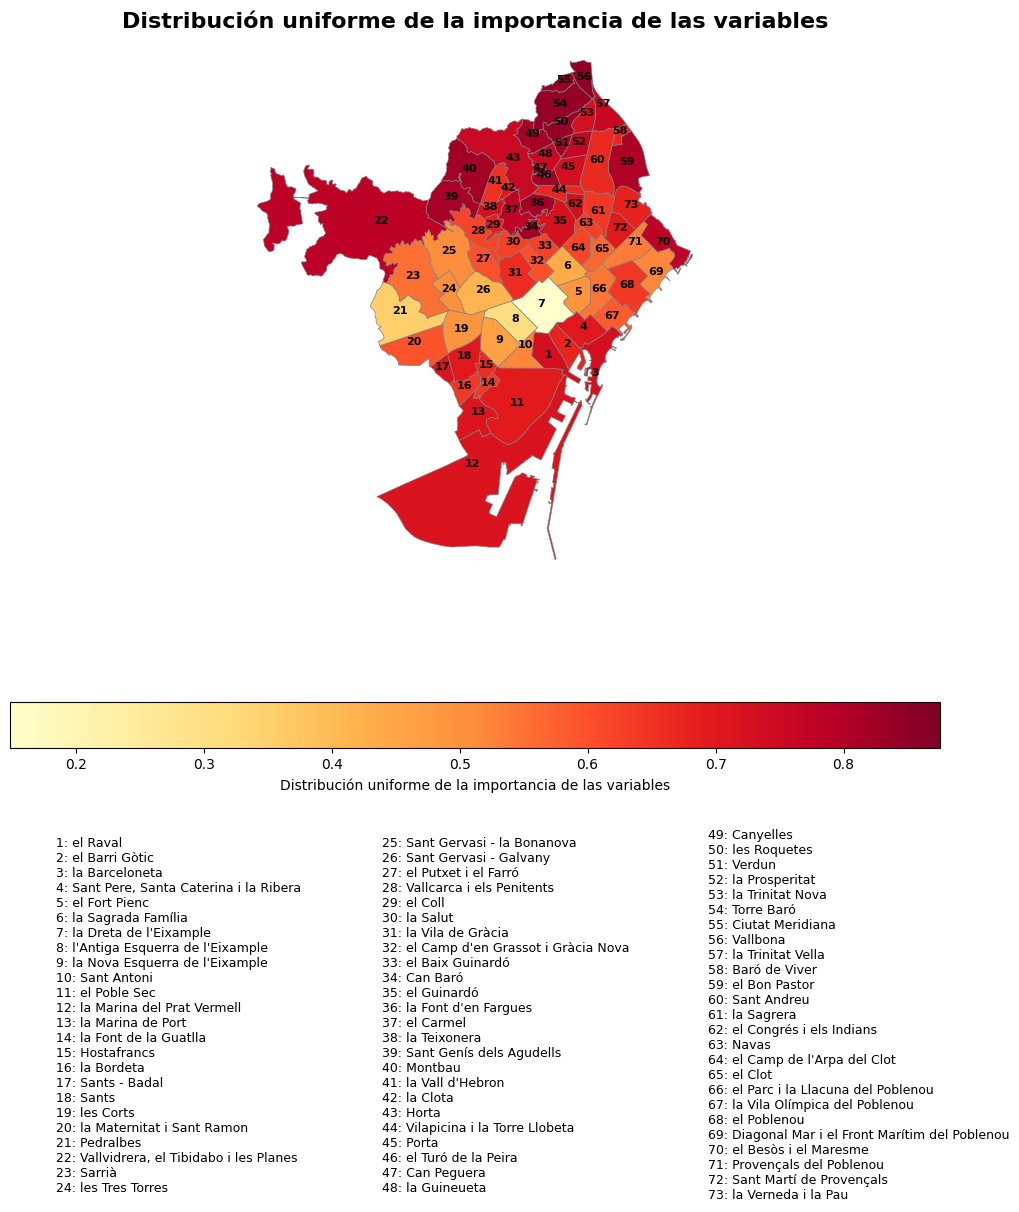

In [88]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

importancia_indices = [0.1, 0.45, 0.45]
columnas_indices = ['Preu (Euros/mes) Mean', 'Indice_Sonido', 'Infraccion_gravedad']

df_normalizado = pd.DataFrame(scaler.fit_transform(alquileres[columnas_indices]), columns=columnas_indices)
alquileres['indice'] = 1 - df_normalizado[columnas_indices].dot(importancia_indices)

show_map(alquileres, barrios, 'indice', 'Índice de calidad de vida por barrio sin importar el precio del alquiler')

importancia_indices = [0.45, 0.1, 0.45]
alquileres['indice'] = 1 - df_normalizado[columnas_indices].dot(importancia_indices)

show_map(alquileres, barrios, 'indice', 'Índice de calidad de vida por barrio sin importar el ruido')

importancia_indices = [0.45, 0.45, 0.1]
alquileres['indice'] = 1 - df_normalizado[columnas_indices].dot(importancia_indices)

show_map(alquileres, barrios, 'indice', 'Índice de calidad de vida por barrio sin importar el número de accidentes')

importancia_indices = [0.33, 0.33, 0.33]
alquileres['indice'] = 1 - df_normalizado[columnas_indices].dot(importancia_indices)

show_map(alquileres, barrios, 'indice', 'Distribución uniforme de la importancia de las variables')

In [ ]:
# Guardamos el dataset final
alquileres.to_csv('data/alquileres.csv', index=False)